In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
from cifar10_utils import load_cifar10, mean_std_normalization_per_pixels, cifar10_compile, show_accuracy
from BasicCNN_model import BasicCNN
from ResNet_model import ResNet
from GCNN_model import GResNet

Get train, test datasets
======

In [2]:
image_datas, label_datas = load_cifar10(path = 'cifardata/cifar-10-batches-py/')

train_datas = np.array(image_datas[:5]).reshape([-1,32,32,3])
train_labels = np.array(label_datas[:5]).reshape([-1])
test_datas = np.array(image_datas[5])
test_labels = np.array(label_datas[5])

print('train shape: ', train_datas.shape)
print('test shape: ',test_datas.shape)

train_datas, test_datas = mean_std_normalization_per_pixels(train_datas, test_datas, False)

image shape:  (6, 10000, 32, 32, 3)
label shape:  (6, 10000)
train shape:  (50000, 32, 32, 3)
test shape:  (10000, 32, 32, 3)


Model compile
======

BasicCNN

In [3]:
filter_num = 48
number_n = 0
weight_decay = 0.0005
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

global_step = tf.Variable(0, trainable=False)
lr = tf.train.exponential_decay(learning_rate = 1e-3,
                                global_step = global_step,
                                decay_steps = 1000,
                                decay_rate= 0.96,
                                staircase=True)

# global_step = tf.Variable(0, trainable=False)
# boundaries = [int(5000*num_classes/batch_size*30), int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*90)]
# values = [0.02, 0.004, 0.0008, 0.00016]
# lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = BasicCNN(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False, res_initializer = None)

optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
# optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

W1128 00:12:58.090041 13900 deprecation_wrapper.py:119] From C:\Python\cifar_project\CIFAR10_pyfile_code\BasicCNN_model.py:39: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1128 00:12:58.096043 13900 deprecation_wrapper.py:119] From C:\Python\cifar_project\CIFAR10_pyfile_code\BasicCNN_model.py:45: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1128 00:12:58.098043 13900 deprecation_wrapper.py:119] From C:\Python\cifar_project\CIFAR10_pyfile_code\layers_and_blocks.py:16: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1128 00:12:58.099045 13900 deprecation.py:506] From C:\Python\cifar_project\CIFAR10_pyfile_code\layers_and_blocks.py:18: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to

Training Model
=======

In [4]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.001



Epoch: 1 Avg_cost: 1.67220223069191
Test Accuracy:  0.6367000013589859
Train Accuracy:  0.6498000007867814



Epoch: 2 Avg_cost: 1.1604181423187263
Test Accuracy:  0.7288000011444091
Train Accuracy:  0.7469999998807907



Epoch: 3 Avg_cost: 0.9596999453306203
Test Accuracy:  0.7649999982118607
Train Accuracy:  0.7835999983549118



Epoch: 4 Avg_cost: 0.8742820581197728
Test Accuracy:  0.7850999993085861
Train Accuracy:  0.8095000004768371



Epoch: 5 Avg_cost: 0.8123229396343237
Test Accuracy:  0.812799996137619
Train Accuracy:  0.8334000009298325



Epoch: 6 Avg_cost: 0.7891778497695927
Test Accuracy:  0.8155999988317489
Train Accuracy:  0.8511999982595444



Epoch: 7 Avg_cost: 0.7675966246128083
Test Accuracy:  0.8285999977588654
Train Accuracy:  0.8640999984741211



Epoch: 8 Avg_cost: 0.7559781066775325
Test Accuracy:  0.8365000003576278
Train Accuracy:  0.8718999987840652



Epoch: 9 Avg_cost: 0.7358638124465939
Test Accuracy:  0.8442999994754792
Train Accuracy:  0.8785999983549118



Epoch: 10 Avg_cost: 0.7350905281305313
Test Accuracy:  0.844799998998642
Train Accuracy:  0.8866999983787537



Epoch: 11 Avg_cost: 0.7250896620750418
Test Accuracy:  0.8516999977827072
Train Accuracy:  0.8876999968290329



Epoch: 12 Avg_cost: 0.7128730071783067
Test Accuracy:  0.8552999991178513
Train Accuracy:  0.8859000009298325



Epoch: 13 Avg_cost: 0.7001268416643139
Test Accuracy:  0.8594999992847443
Train Accuracy:  0.9019000011682511



Epoch: 14 Avg_cost: 0.7026117725968367
Test Accuracy:  0.8653999960422516
Train Accuracy:  0.9025000017881394



Epoch: 15 Avg_cost: 0.674538498938083
Test Accuracy:  0.8671000009775162
Train Accuracy:  0.9123999994993209



Epoch: 16 Avg_cost: 0.674775883495808
Test Accuracy:  0.8718999987840652
Train Accuracy:  0.9113000005483627



Epoch: 17 Avg_cost: 0.66794699126482
Test Accuracy:  0.8706999999284745
Train Accuracy:  0.9104999995231629



Epoch: 18 Avg_cost: 0.6582864496111867
Test Accuracy:  0.8683999997377395
Train Accuracy:  0.9214999979734421



Epoch: 19 Avg_cost: 0.6394248794317238
Test Accuracy:  0.8733999997377395
Train Accuracy:  0.9190000003576279



Epoch: 20 Avg_cost: 0.6362331762313849
Test Accuracy:  0.8749999982118607
Train Accuracy:  0.9262000054121018



Epoch: 21 Avg_cost: 0.6219831668734547
Test Accuracy:  0.8693000018596649
Train Accuracy:  0.9228000009059906



Epoch: 22 Avg_cost: 0.6125583191514012
Test Accuracy:  0.871099995970726
Train Accuracy:  0.9210000002384185



Epoch: 23 Avg_cost: 0.6067829834222793
Test Accuracy:  0.8794000017642974
Train Accuracy:  0.9297000002861023



Epoch: 24 Avg_cost: 0.5960032773613931
Test Accuracy:  0.8771999973058701
Train Accuracy:  0.9299999970197678



Epoch: 25 Avg_cost: 0.5898135266304019
Test Accuracy:  0.8851999992132187
Train Accuracy:  0.9392000037431717



Epoch: 26 Avg_cost: 0.5777679082155228
Test Accuracy:  0.8772000008821488
Train Accuracy:  0.9283000046014785



Epoch: 27 Avg_cost: 0.5716403059959414
Test Accuracy:  0.8804000014066696
Train Accuracy:  0.9334000009298324



Epoch: 28 Avg_cost: 0.5587909266948704
Test Accuracy:  0.8777000004053116
Train Accuracy:  0.9361000043153763



Epoch: 29 Avg_cost: 0.5548939742445944
Test Accuracy:  0.8772999984025955
Train Accuracy:  0.9401000040769577



Epoch: 30 Avg_cost: 0.5457819070816039
Test Accuracy:  0.8859000009298325
Train Accuracy:  0.9501000010967254



Epoch: 31 Avg_cost: 0.5323342722654338
Test Accuracy:  0.8834000021219254
Train Accuracy:  0.9462000024318695



Epoch: 32 Avg_cost: 0.5334617707729337
Test Accuracy:  0.8878999990224838
Train Accuracy:  0.9471000027656555



Epoch: 33 Avg_cost: 0.5205013908147816
Test Accuracy:  0.887000002861023
Train Accuracy:  0.9462000018358231



Epoch: 34 Avg_cost: 0.5094267163872722
Test Accuracy:  0.8860999977588654
Train Accuracy:  0.9469000041484833



Epoch: 35 Avg_cost: 0.5046548331975937
Test Accuracy:  0.8847000002861023
Train Accuracy:  0.9563000041246414



Epoch: 36 Avg_cost: 0.5046324143409725
Test Accuracy:  0.8846000003814697
Train Accuracy:  0.9503000044822693



Epoch: 37 Avg_cost: 0.4919174003005029
Test Accuracy:  0.8877000027894973
Train Accuracy:  0.954500002861023



Epoch: 38 Avg_cost: 0.48146099478006377
Test Accuracy:  0.8851999998092651
Train Accuracy:  0.9576000046730041



Epoch: 39 Avg_cost: 0.47219879275560395
Test Accuracy:  0.8880999994277954
Train Accuracy:  0.9604000049829483



Epoch: 40 Avg_cost: 0.4715918630361553
Test Accuracy:  0.8860999983549118
Train Accuracy:  0.9565000063180924



Epoch: 41 Avg_cost: 0.45915915602445595
Test Accuracy:  0.8923000007867813
Train Accuracy:  0.9601000046730042



Epoch: 42 Avg_cost: 0.45012143564224255
Test Accuracy:  0.8904000002145768
Train Accuracy:  0.9637000012397766



Epoch: 43 Avg_cost: 0.439992381453514
Test Accuracy:  0.8928000009059907
Train Accuracy:  0.9611000061035156



Epoch: 44 Avg_cost: 0.4415730928182603
Test Accuracy:  0.891599999666214
Train Accuracy:  0.9608000051975251



Epoch: 45 Avg_cost: 0.43172686445713077
Test Accuracy:  0.894300001859665
Train Accuracy:  0.9630000030994416



Epoch: 46 Avg_cost: 0.4291334394812582
Test Accuracy:  0.8942000013589859
Train Accuracy:  0.9626000046730041



Epoch: 47 Avg_cost: 0.41716472339630123
Test Accuracy:  0.893400000333786
Train Accuracy:  0.9671000075340271



Epoch: 48 Avg_cost: 0.4098438459634781
Test Accuracy:  0.8968000042438508
Train Accuracy:  0.9654000079631806



Epoch: 49 Avg_cost: 0.40883798140287364
Test Accuracy:  0.8965999990701675
Train Accuracy:  0.9664000058174134



Epoch: 50 Avg_cost: 0.4035730609893799
Test Accuracy:  0.8941000032424927
Train Accuracy:  0.9664000058174134



Epoch: 51 Avg_cost: 0.39469810658693283
Test Accuracy:  0.8959000015258789
Train Accuracy:  0.9698000073432922



Epoch: 52 Avg_cost: 0.39713517284393335
Test Accuracy:  0.895700004696846
Train Accuracy:  0.9691000056266784



Epoch: 53 Avg_cost: 0.3874554349780084
Test Accuracy:  0.8963000005483628
Train Accuracy:  0.9713000053167343



Epoch: 54 Avg_cost: 0.3788727568387985
Test Accuracy:  0.8971999996900558
Train Accuracy:  0.9710000079870224



Epoch: 55 Avg_cost: 0.3706667243838308
Test Accuracy:  0.8966000008583069
Train Accuracy:  0.9761000096797943



Epoch: 56 Avg_cost: 0.365021360337734
Test Accuracy:  0.8949000000953674
Train Accuracy:  0.9719000077247619



Epoch: 57 Avg_cost: 0.3647388277649875
Test Accuracy:  0.8968999999761581
Train Accuracy:  0.974200010895729



Epoch: 58 Avg_cost: 0.35676454097032545
Test Accuracy:  0.8958000022172928
Train Accuracy:  0.972400004863739



Epoch: 59 Avg_cost: 0.3475863228738309
Test Accuracy:  0.8999000006914138
Train Accuracy:  0.9762000095844269



Epoch: 60 Avg_cost: 0.34874953877925846
Test Accuracy:  0.8958000022172928
Train Accuracy:  0.974200010895729



Epoch: 61 Avg_cost: 0.33873471516370796
Test Accuracy:  0.8936999988555908
Train Accuracy:  0.9769000107049942



Epoch: 62 Avg_cost: 0.34138736188411706
Test Accuracy:  0.9000999993085861
Train Accuracy:  0.9779000097513199



Epoch: 63 Avg_cost: 0.3298073293566703
Test Accuracy:  0.8958000028133393
Train Accuracy:  0.9785000097751617



Epoch: 64 Avg_cost: 0.3274594950973988
Test Accuracy:  0.8993999999761582
Train Accuracy:  0.9761000090837478



Epoch: 65 Avg_cost: 0.3226280748844151
Test Accuracy:  0.8967000013589859
Train Accuracy:  0.9793000119924545



Epoch: 66 Avg_cost: 0.31813629093766216
Test Accuracy:  0.902900002002716
Train Accuracy:  0.9816000133752822



Epoch: 67 Avg_cost: 0.31189937353134173
Test Accuracy:  0.9011999994516373
Train Accuracy:  0.9832000094652176



Epoch: 68 Avg_cost: 0.3048405424952507
Test Accuracy:  0.8987000036239624
Train Accuracy:  0.9829000109434127



Epoch: 69 Avg_cost: 0.30473413857817655
Test Accuracy:  0.9014000034332276
Train Accuracy:  0.9783000069856643



Epoch: 70 Avg_cost: 0.29945972701907136
Test Accuracy:  0.9004000025987625
Train Accuracy:  0.9816000109910965



Epoch: 71 Avg_cost: 0.2972172243595123
Test Accuracy:  0.9013000011444092
Train Accuracy:  0.9807000112533569



Epoch: 72 Avg_cost: 0.29341805630922324
Test Accuracy:  0.9015000015497208
Train Accuracy:  0.9813000100851059



Epoch: 73 Avg_cost: 0.2863936165571214
Test Accuracy:  0.9028000020980835
Train Accuracy:  0.9830000078678132



Epoch: 74 Avg_cost: 0.28931608828902255
Test Accuracy:  0.9032000005245209
Train Accuracy:  0.9833000111579895



Epoch: 75 Avg_cost: 0.28169155254960093
Test Accuracy:  0.9020000004768371
Train Accuracy:  0.9839000105857849



Epoch: 76 Avg_cost: 0.2809629534780975
Test Accuracy:  0.9015000033378601
Train Accuracy:  0.9838000106811523



Epoch: 77 Avg_cost: 0.27140096485614773
Test Accuracy:  0.903299999833107
Train Accuracy:  0.9842000120878219



Epoch: 78 Avg_cost: 0.2687185475528241
Test Accuracy:  0.9006000006198883
Train Accuracy:  0.9829000109434127



Epoch: 79 Avg_cost: 0.2645794759988784
Test Accuracy:  0.9015000009536743
Train Accuracy:  0.9873000085353851



Epoch: 80 Avg_cost: 0.2612506173551083
Test Accuracy:  0.9021000009775162
Train Accuracy:  0.9845000106096268



Epoch: 81 Avg_cost: 0.255950634509325
Test Accuracy:  0.9031000006198883
Train Accuracy:  0.9861000114679337



Epoch: 82 Avg_cost: 0.2549903002679348
Test Accuracy:  0.9024000000953675
Train Accuracy:  0.9891000086069107



Epoch: 83 Avg_cost: 0.2508764271140097
Test Accuracy:  0.9046000027656556
Train Accuracy:  0.989000009894371



Epoch: 84 Avg_cost: 0.24675101915001862
Test Accuracy:  0.9021000003814698
Train Accuracy:  0.986700012087822



Epoch: 85 Avg_cost: 0.24282036751508712
Test Accuracy:  0.9030000001192093
Train Accuracy:  0.9870000076293945



Epoch: 86 Avg_cost: 0.2422583504617215
Test Accuracy:  0.9023000007867813
Train Accuracy:  0.9896000093221664



Epoch: 87 Avg_cost: 0.2348263289034368
Test Accuracy:  0.9060000014305115
Train Accuracy:  0.9886000084877015



Epoch: 88 Avg_cost: 0.23588420686125774
Test Accuracy:  0.9064000004529953
Train Accuracy:  0.9886000090837479



Epoch: 89 Avg_cost: 0.23056915125250826
Test Accuracy:  0.9041000008583069
Train Accuracy:  0.9909000080823899



Epoch: 90 Avg_cost: 0.22955289092659964
Test Accuracy:  0.9041000026464462
Train Accuracy:  0.9880000084638596



Epoch: 91 Avg_cost: 0.22687305268645305
Test Accuracy:  0.9055999982357025
Train Accuracy:  0.9884000098705292



Epoch: 92 Avg_cost: 0.22281479409337063
Test Accuracy:  0.9069000017642975
Train Accuracy:  0.9908000075817108



Epoch: 93 Avg_cost: 0.21653946098685292
Test Accuracy:  0.9047000044584275
Train Accuracy:  0.9899000090360641



Epoch: 94 Avg_cost: 0.21738133111596114
Test Accuracy:  0.9010000026226044
Train Accuracy:  0.9911000084877014



Epoch: 95 Avg_cost: 0.2166512446403502
Test Accuracy:  0.9058999991416932
Train Accuracy:  0.9893000090122223



Epoch: 96 Avg_cost: 0.21195552375912688
Test Accuracy:  0.9063000017404557
Train Accuracy:  0.9940000057220459



Epoch: 97 Avg_cost: 0.20827253937721263
Test Accuracy:  0.9056000000238419
Train Accuracy:  0.9910000079870224



Epoch: 98 Avg_cost: 0.2047081645727159
Test Accuracy:  0.9067000007629394
Train Accuracy:  0.9914000082015991



Epoch: 99 Avg_cost: 0.20569394129514695
Test Accuracy:  0.9087999999523163
Train Accuracy:  0.9915000075101852



Epoch: 100 Avg_cost: 0.2006327747404579
Test Accuracy:  0.9072000014781952
Train Accuracy:  0.9927000069618225



Epoch: 101 Avg_cost: 0.19994125857949235
Test Accuracy:  0.9047999978065491
Train Accuracy:  0.9905000084638595



Epoch: 102 Avg_cost: 0.19448091980814933
Test Accuracy:  0.9056000000238419
Train Accuracy:  0.9926000064611435



Epoch: 103 Avg_cost: 0.19089329227805127
Test Accuracy:  0.9101999998092651
Train Accuracy:  0.993500006198883



Epoch: 104 Avg_cost: 0.18982880190014836
Test Accuracy:  0.9094000017642975
Train Accuracy:  0.9931000059843064



Epoch: 105 Avg_cost: 0.18835736000537892
Test Accuracy:  0.9078000020980835
Train Accuracy:  0.9941000056266784



Epoch: 106 Avg_cost: 0.18552902767062177
Test Accuracy:  0.906100001335144
Train Accuracy:  0.9943000048398971



Epoch: 107 Avg_cost: 0.18414997494220745
Test Accuracy:  0.9095000016689301
Train Accuracy:  0.9927000069618225



Epoch: 108 Avg_cost: 0.18206251573562637
Test Accuracy:  0.9075000029802323
Train Accuracy:  0.9928000068664551



Epoch: 109 Avg_cost: 0.17907405397295947
Test Accuracy:  0.9095999997854233
Train Accuracy:  0.9945000052452088



Epoch: 110 Avg_cost: 0.17826175597310073
Test Accuracy:  0.9081000030040741
Train Accuracy:  0.9947000050544739



Epoch: 111 Avg_cost: 0.17592035061120986
Test Accuracy:  0.9080000001192093
Train Accuracy:  0.9947000044584274



Epoch: 112 Avg_cost: 0.17672392022609726
Test Accuracy:  0.9097000020742416
Train Accuracy:  0.9932000058889389



Epoch: 113 Avg_cost: 0.17402282258868207
Test Accuracy:  0.9088000011444092
Train Accuracy:  0.994100005030632



Epoch: 114 Avg_cost: 0.1694490878880023
Test Accuracy:  0.906600005030632
Train Accuracy:  0.9937000060081482



Epoch: 115 Avg_cost: 0.16797026503086107
Test Accuracy:  0.9113999998569489
Train Accuracy:  0.994900004863739



Epoch: 116 Avg_cost: 0.16660755431652072
Test Accuracy:  0.9082000035047532
Train Accuracy:  0.9945000052452088



Epoch: 117 Avg_cost: 0.1638818034827709
Test Accuracy:  0.9125999987125397
Train Accuracy:  0.9943000054359437



Epoch: 118 Avg_cost: 0.16273673230409608
Test Accuracy:  0.9096000003814697
Train Accuracy:  0.9950000047683716



Epoch: 119 Avg_cost: 0.16139729231595995
Test Accuracy:  0.9106000012159348
Train Accuracy:  0.9955000042915344



Epoch: 120 Avg_cost: 0.16008475577831266
Test Accuracy:  0.9057000005245208
Train Accuracy:  0.9950000047683716



Epoch: 121 Avg_cost: 0.15687454614043242
Test Accuracy:  0.9116000014543534
Train Accuracy:  0.9969000029563904



Epoch: 122 Avg_cost: 0.15535259631276122
Test Accuracy:  0.9091000014543533
Train Accuracy:  0.9958000040054321



Epoch: 123 Avg_cost: 0.154410356581211
Test Accuracy:  0.9066000020503998
Train Accuracy:  0.9963000035285949



Epoch: 124 Avg_cost: 0.1530507005751133
Test Accuracy:  0.9077000027894974
Train Accuracy:  0.9955000042915344



Epoch: 125 Avg_cost: 0.15273531243205066
Test Accuracy:  0.9084000033140183
Train Accuracy:  0.9963000035285949



Epoch: 126 Avg_cost: 0.14935802298784245
Test Accuracy:  0.9114000016450882
Train Accuracy:  0.9961000037193298



Epoch: 127 Avg_cost: 0.14808022515475747
Test Accuracy:  0.9097999995946884
Train Accuracy:  0.9968000030517579



Epoch: 128 Avg_cost: 0.1465390424132348
Test Accuracy:  0.9100000011920929
Train Accuracy:  0.9948000049591065



Epoch: 129 Avg_cost: 0.1436182236373423
Test Accuracy:  0.9130000001192093
Train Accuracy:  0.9967000031471253



Epoch: 130 Avg_cost: 0.14448065280914313
Test Accuracy:  0.9127000015974045
Train Accuracy:  0.9966000032424926



Epoch: 131 Avg_cost: 0.14283329492807384
Test Accuracy:  0.9113000023365021
Train Accuracy:  0.9978000020980835



Epoch: 132 Avg_cost: 0.14001102745532978
Test Accuracy:  0.9116000026464463
Train Accuracy:  0.9965000033378602



Epoch: 133 Avg_cost: 0.13874619916081404
Test Accuracy:  0.9102000021934509
Train Accuracy:  0.9975000023841858



Epoch: 134 Avg_cost: 0.13700849711894997
Test Accuracy:  0.9114999985694885
Train Accuracy:  0.997000002861023



Epoch: 135 Avg_cost: 0.13674750931560986
Test Accuracy:  0.9098000025749207
Train Accuracy:  0.9969000029563904



Epoch: 136 Avg_cost: 0.1358210771977903
Test Accuracy:  0.9108000004291534
Train Accuracy:  0.9976000022888184



Epoch: 137 Avg_cost: 0.13352216430008418
Test Accuracy:  0.9114000016450882
Train Accuracy:  0.9973000025749207



Epoch: 138 Avg_cost: 0.1310860484391451
Test Accuracy:  0.9101000034809112
Train Accuracy:  0.9964000034332275



Epoch: 139 Avg_cost: 0.13024711950123322
Test Accuracy:  0.9109000015258789
Train Accuracy:  0.9967000031471253



Epoch: 140 Avg_cost: 0.1288655160367489
Test Accuracy:  0.9085000020265579
Train Accuracy:  0.997000002861023



Epoch: 141 Avg_cost: 0.1296981220841409
Test Accuracy:  0.9117000019550323
Train Accuracy:  0.9980000019073486



Epoch: 142 Avg_cost: 0.1287386306077241
Test Accuracy:  0.913800002336502
Train Accuracy:  0.9977000021934509



Epoch: 143 Avg_cost: 0.1274639724940061
Test Accuracy:  0.9095000058412552
Train Accuracy:  0.9975000023841858



Epoch: 144 Avg_cost: 0.12451482674479493
Test Accuracy:  0.9115000003576279
Train Accuracy:  0.9968000030517579



Epoch: 145 Avg_cost: 0.12375737729668616
Test Accuracy:  0.9110000026226044
Train Accuracy:  0.9979000020027161



Epoch: 146 Avg_cost: 0.1227284648120403
Test Accuracy:  0.9106000018119812
Train Accuracy:  0.9975000023841858



Epoch: 147 Avg_cost: 0.12324713586270808
Test Accuracy:  0.9122000014781952
Train Accuracy:  0.9977000021934509



Epoch: 148 Avg_cost: 0.12091118970513334
Test Accuracy:  0.909300000667572
Train Accuracy:  0.9977000015974045



Epoch: 149 Avg_cost: 0.1213424180597067
Test Accuracy:  0.9120000010728836
Train Accuracy:  0.998600001335144



Epoch: 150 Avg_cost: 0.11825846216082578
Test Accuracy:  0.9101000040769577
Train Accuracy:  0.9978000020980835



Epoch: 151 Avg_cost: 0.11699499230086803
Test Accuracy:  0.9093999963998795
Train Accuracy:  0.9979000020027161



Epoch: 152 Avg_cost: 0.11690694813430316
Test Accuracy:  0.9128000020980835
Train Accuracy:  0.9990000009536744



Epoch: 153 Avg_cost: 0.11594153831899168
Test Accuracy:  0.9110000032186508
Train Accuracy:  0.9974000024795532



Epoch: 154 Avg_cost: 0.11582914045453076
Test Accuracy:  0.9106999987363815
Train Accuracy:  0.998600001335144



Epoch: 155 Avg_cost: 0.1141621894389391
Test Accuracy:  0.9094999974966049
Train Accuracy:  0.9985000014305114



Epoch: 156 Avg_cost: 0.11423431107401846
Test Accuracy:  0.9079000008106232
Train Accuracy:  0.9981000018119812



Epoch: 157 Avg_cost: 0.11241059419512758
Test Accuracy:  0.9114000028371811
Train Accuracy:  0.9981000018119812



Epoch: 158 Avg_cost: 0.11151390932500366
Test Accuracy:  0.9122000020742417
Train Accuracy:  0.9984000015258789



Epoch: 159 Avg_cost: 0.11066270510852336
Test Accuracy:  0.9125999987125397
Train Accuracy:  0.9982000017166137



Epoch: 160 Avg_cost: 0.10851128238439559
Test Accuracy:  0.9109000009298325
Train Accuracy:  0.9988000011444091



Epoch: 161 Avg_cost: 0.10820161823928347
Test Accuracy:  0.9130000019073486
Train Accuracy:  0.998600001335144



Epoch: 162 Avg_cost: 0.10806691507995139
Test Accuracy:  0.9138000029325485
Train Accuracy:  0.998600001335144



Epoch: 163 Avg_cost: 0.10786097848415362
Test Accuracy:  0.9130000007152558
Train Accuracy:  0.9992000007629395



Epoch: 164 Avg_cost: 0.10781649658083907
Test Accuracy:  0.9119000035524368
Train Accuracy:  0.9994000005722046



Epoch: 165 Avg_cost: 0.10596201044321064
Test Accuracy:  0.9124000012874603
Train Accuracy:  0.998600001335144



Epoch: 166 Avg_cost: 0.10512639218568794
Test Accuracy:  0.913100004196167
Train Accuracy:  0.9981000018119812



Epoch: 167 Avg_cost: 0.10451985606551188
Test Accuracy:  0.9130999994277954
Train Accuracy:  0.9991000008583069



Epoch: 168 Avg_cost: 0.10356617811322216
Test Accuracy:  0.9124000012874603
Train Accuracy:  0.9984000015258789



Epoch: 169 Avg_cost: 0.10372340583801272
Test Accuracy:  0.9129000008106232
Train Accuracy:  0.9982000017166137



Epoch: 170 Avg_cost: 0.10218788397312173
Test Accuracy:  0.9162000018358231
Train Accuracy:  0.9991000008583069



Epoch: 171 Avg_cost: 0.10170114839077007
Test Accuracy:  0.9130000013113022
Train Accuracy:  0.9995000004768372



Epoch: 172 Avg_cost: 0.1005781653672457
Test Accuracy:  0.9140000027418137
Train Accuracy:  0.998600001335144



Epoch: 173 Avg_cost: 0.10035423074662682
Test Accuracy:  0.9141000020503998
Train Accuracy:  0.9988000011444091



Epoch: 174 Avg_cost: 0.09961554299294947
Test Accuracy:  0.9133000010251999
Train Accuracy:  0.9985000014305114



Epoch: 175 Avg_cost: 0.09919003067910666
Test Accuracy:  0.9136000025272369
Train Accuracy:  0.9987000012397766



Epoch: 176 Avg_cost: 0.09921239998936651
Test Accuracy:  0.915100001692772
Train Accuracy:  0.9983000016212463



Epoch: 177 Avg_cost: 0.09799167816340917
Test Accuracy:  0.9165000009536743
Train Accuracy:  0.9993000006675721



Epoch: 178 Avg_cost: 0.09806502041220663
Test Accuracy:  0.9162000006437302
Train Accuracy:  0.9992000007629395



Epoch: 179 Avg_cost: 0.09659283104538921
Test Accuracy:  0.9154000043869018
Train Accuracy:  0.9988000011444091



Epoch: 180 Avg_cost: 0.09596052780747415
Test Accuracy:  0.9157000005245208
Train Accuracy:  0.9987000012397766



Epoch: 181 Avg_cost: 0.09544711337983615
Test Accuracy:  0.9146000027656556
Train Accuracy:  0.9991000008583069



Epoch: 182 Avg_cost: 0.09445052231848235
Test Accuracy:  0.9148000025749207
Train Accuracy:  0.9993000006675721



Epoch: 183 Avg_cost: 0.09428083600103837
Test Accuracy:  0.9145999997854233
Train Accuracy:  0.9992000007629395



Epoch: 184 Avg_cost: 0.09433780054748074
Test Accuracy:  0.9154000020027161
Train Accuracy:  0.9994000005722046



Epoch: 185 Avg_cost: 0.0931234579682351
Test Accuracy:  0.9156000030040741
Train Accuracy:  0.9993000006675721



Epoch: 186 Avg_cost: 0.09233695623278611
Test Accuracy:  0.9149000024795533
Train Accuracy:  0.9994000005722046



Epoch: 187 Avg_cost: 0.09283174362778666
Test Accuracy:  0.9138000011444092
Train Accuracy:  0.9995000004768372



Epoch: 188 Avg_cost: 0.09200904007256032
Test Accuracy:  0.9124000048637391
Train Accuracy:  0.9991000008583069



Epoch: 189 Avg_cost: 0.0913977000266314
Test Accuracy:  0.9131000030040741
Train Accuracy:  0.9995000004768372



Epoch: 190 Avg_cost: 0.09054688106477257
Test Accuracy:  0.9144000047445298
Train Accuracy:  0.9989000010490418



Epoch: 191 Avg_cost: 0.08992494942247879
Test Accuracy:  0.9120000040531159
Train Accuracy:  0.9995000004768372



Epoch: 192 Avg_cost: 0.0894533142894505
Test Accuracy:  0.9138000047206879
Train Accuracy:  0.9993000006675721



Epoch: 193 Avg_cost: 0.0887004475146533
Test Accuracy:  0.9144000029563903
Train Accuracy:  0.9992000007629395



Epoch: 194 Avg_cost: 0.0897142741084099
Test Accuracy:  0.915400003194809
Train Accuracy:  0.9994000005722046



Epoch: 195 Avg_cost: 0.08776940815150738
Test Accuracy:  0.9152000033855439
Train Accuracy:  0.9995000004768372



Epoch: 196 Avg_cost: 0.08801191127300256
Test Accuracy:  0.9143000042438507
Train Accuracy:  0.9995000004768372



Epoch: 197 Avg_cost: 0.08748077856004241
Test Accuracy:  0.9143000024557114
Train Accuracy:  0.9998000001907349



Epoch: 198 Avg_cost: 0.0869661672413349
Test Accuracy:  0.9137000000476837
Train Accuracy:  0.9991000008583069



Epoch: 199 Avg_cost: 0.08712776723504068
Test Accuracy:  0.9132000017166138
Train Accuracy:  0.9993000006675721



Epoch: 200 Avg_cost: 0.08695412987470627
Test Accuracy:  0.9131000018119813
Train Accuracy:  0.9994000005722046
200 epoch done
last learning rate: 1.6870283e-05


Saving model
=======

In [7]:
import time
import os
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "BasicCNN_{}\BasicCNN_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

'model\\BasicCNN_2019_11_28_09_36\\BasicCNN_2019_11_28_09_36'

Showing accuracy graph
======

0.9139400028586389
0.9994000005722047


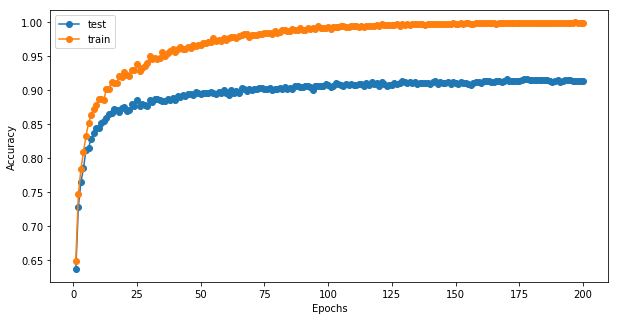

In [9]:
print(np.mean(model_compile.test_acc_list[-10:]))
print(np.mean(model_compile.train_acc_list[-10:]))
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)

Model compile
======

ResNet20

In [16]:
filter_num = 16
number_n = 3
weight_decay = 0.0001
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

# global_step = tf.Variable(0, trainable=False)
# lr = tf.train.exponential_decay(learning_rate = 1e-3,
#                                 global_step = global_step,
#                                 decay_steps = 1000,
#                                 decay_rate= 0.96,
#                                 staircase=True)

global_step = tf.Variable(0, trainable=False)
boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*120), int(5000*num_classes/batch_size*160)]
values = [0.02, 0.004, 0.0008, 0.00016]
lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False)

# optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

Training Model
=======

In [17]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.02



Epoch: 1 Avg_cost: 1.8562413685321806
Test Accuracy:  0.44799999803304674
Train Accuracy:  0.43839999884366987



Epoch: 2 Avg_cost: 1.4055137306451795
Test Accuracy:  0.5950999993085861
Train Accuracy:  0.5982999992370606



Epoch: 3 Avg_cost: 1.1188543927669512
Test Accuracy:  0.6443000012636184
Train Accuracy:  0.6571999979019165



Epoch: 4 Avg_cost: 0.9206055003404615
Test Accuracy:  0.7130000007152557
Train Accuracy:  0.7207000029087066



Epoch: 5 Avg_cost: 0.805219903469085
Test Accuracy:  0.7402000004053115
Train Accuracy:  0.7571999990940094



Epoch: 6 Avg_cost: 0.711893550276756
Test Accuracy:  0.7642999988794327
Train Accuracy:  0.7880999970436097



Epoch: 7 Avg_cost: 0.6493266115188597
Test Accuracy:  0.7953999972343445
Train Accuracy:  0.7995999962091446



Epoch: 8 Avg_cost: 0.6078167539834977
Test Accuracy:  0.8078999972343445
Train Accuracy:  0.8278999978303909



Epoch: 9 Avg_cost: 0.570363897442818
Test Accuracy:  0.820399997830391
Train Accuracy:  0.839699998497963



Epoch: 10 Avg_cost: 0.5378434995412832
Test Accuracy:  0.8303999960422516
Train Accuracy:  0.8583999997377396



Epoch: 11 Avg_cost: 0.5125591780543329
Test Accuracy:  0.8332000029087067
Train Accuracy:  0.8609999978542328



Epoch: 12 Avg_cost: 0.49622463315725346
Test Accuracy:  0.8347999984025956
Train Accuracy:  0.866999997496605



Epoch: 13 Avg_cost: 0.48247618103027323
Test Accuracy:  0.8405999994277954
Train Accuracy:  0.8687000000476837



Epoch: 14 Avg_cost: 0.45966570156812675
Test Accuracy:  0.8431999981403351
Train Accuracy:  0.8776999998092652



Epoch: 15 Avg_cost: 0.45377407523989705
Test Accuracy:  0.8480000019073486
Train Accuracy:  0.8853999996185302



Epoch: 16 Avg_cost: 0.44160385894775384
Test Accuracy:  0.8478999966382981
Train Accuracy:  0.8867999994754792



Epoch: 17 Avg_cost: 0.42589803457260134
Test Accuracy:  0.8564999979734421
Train Accuracy:  0.8892000025510788



Epoch: 18 Avg_cost: 0.42088002523779877
Test Accuracy:  0.8595999985933304
Train Accuracy:  0.8927000045776368



Epoch: 19 Avg_cost: 0.4046914422512055
Test Accuracy:  0.8560999965667725
Train Accuracy:  0.8964000010490417



Epoch: 20 Avg_cost: 0.40408014988899227
Test Accuracy:  0.8618999987840652
Train Accuracy:  0.9083000028133392



Epoch: 21 Avg_cost: 0.395196902006864
Test Accuracy:  0.8590999990701675
Train Accuracy:  0.9058999991416932



Epoch: 22 Avg_cost: 0.3883091312944891
Test Accuracy:  0.864799997806549
Train Accuracy:  0.9086000001430512



Epoch: 23 Avg_cost: 0.3732880091071126
Test Accuracy:  0.8702999973297119
Train Accuracy:  0.9154000008106231



Epoch: 24 Avg_cost: 0.3700237951278687
Test Accuracy:  0.8616999983787537
Train Accuracy:  0.9061000019311904



Epoch: 25 Avg_cost: 0.36845385912060746
Test Accuracy:  0.8639999967813492
Train Accuracy:  0.9139000016450882



Epoch: 26 Avg_cost: 0.36616211137175547
Test Accuracy:  0.870799999833107
Train Accuracy:  0.9163000029325485



Epoch: 27 Avg_cost: 0.3568568839132786
Test Accuracy:  0.8667000007629394
Train Accuracy:  0.9115000021457672



Epoch: 28 Avg_cost: 0.35237730595469513
Test Accuracy:  0.868899998664856
Train Accuracy:  0.921900001168251



Epoch: 29 Avg_cost: 0.34428587707877184
Test Accuracy:  0.8685999995470047
Train Accuracy:  0.9169000035524368



Epoch: 30 Avg_cost: 0.3471137265264985
Test Accuracy:  0.8748000001907349
Train Accuracy:  0.9206000012159348



Epoch: 31 Avg_cost: 0.34604211768508003
Test Accuracy:  0.8710000014305115
Train Accuracy:  0.919300000667572



Epoch: 32 Avg_cost: 0.3369060648977754
Test Accuracy:  0.8701999980211258
Train Accuracy:  0.922800001502037



Epoch: 33 Avg_cost: 0.33199095840752135
Test Accuracy:  0.8754000025987625
Train Accuracy:  0.9277000010013581



Epoch: 34 Avg_cost: 0.33169678950309733
Test Accuracy:  0.8783000010251999
Train Accuracy:  0.9305000019073486



Epoch: 35 Avg_cost: 0.32193512120842943
Test Accuracy:  0.870100000500679
Train Accuracy:  0.932399999499321



Epoch: 36 Avg_cost: 0.32144204205274546
Test Accuracy:  0.873999999165535
Train Accuracy:  0.9241000020503998



Epoch: 37 Avg_cost: 0.31930926173925384
Test Accuracy:  0.8789000022411346
Train Accuracy:  0.936299996972084



Epoch: 38 Avg_cost: 0.317288788110018
Test Accuracy:  0.8749999994039536
Train Accuracy:  0.9303000044822692



Epoch: 39 Avg_cost: 0.31442314606904964
Test Accuracy:  0.8691999977827072
Train Accuracy:  0.931100001335144



Epoch: 40 Avg_cost: 0.31240255767107017
Test Accuracy:  0.8755000001192093
Train Accuracy:  0.9321000015735627



Epoch: 41 Avg_cost: 0.3111164768338203
Test Accuracy:  0.8793999987840653
Train Accuracy:  0.9351000028848648



Epoch: 42 Avg_cost: 0.3067365645170215
Test Accuracy:  0.8767999994754792
Train Accuracy:  0.9358000034093856



Epoch: 43 Avg_cost: 0.3046037182807926
Test Accuracy:  0.877600000500679
Train Accuracy:  0.9378000020980835



Epoch: 44 Avg_cost: 0.29881188714504286
Test Accuracy:  0.8778000009059906
Train Accuracy:  0.9403000020980835



Epoch: 45 Avg_cost: 0.3019132833778855
Test Accuracy:  0.8749000000953674
Train Accuracy:  0.9337000012397766



Epoch: 46 Avg_cost: 0.29938847902417187
Test Accuracy:  0.8792999988794327
Train Accuracy:  0.9383000004291534



Epoch: 47 Avg_cost: 0.2976604216098789
Test Accuracy:  0.878299999833107
Train Accuracy:  0.9419000041484833



Epoch: 48 Avg_cost: 0.2920404491126536
Test Accuracy:  0.8833000016212463
Train Accuracy:  0.9485000032186508



Epoch: 49 Avg_cost: 0.28707992041110997
Test Accuracy:  0.8779000008106231
Train Accuracy:  0.9452000027894973



Epoch: 50 Avg_cost: 0.2956677184700966
Test Accuracy:  0.8797000002861023
Train Accuracy:  0.9465000033378601



Epoch: 51 Avg_cost: 0.2927678449153901
Test Accuracy:  0.8760000014305115
Train Accuracy:  0.9350000011920929



Epoch: 52 Avg_cost: 0.28328516802191733
Test Accuracy:  0.8817999988794327
Train Accuracy:  0.9446000015735626



Epoch: 53 Avg_cost: 0.293164939761162
Test Accuracy:  0.8800000017881393
Train Accuracy:  0.9457000041007996



Epoch: 54 Avg_cost: 0.28509700483083716
Test Accuracy:  0.88
Train Accuracy:  0.9430000019073487



Epoch: 55 Avg_cost: 0.28001560088992095
Test Accuracy:  0.8798000013828278
Train Accuracy:  0.9436000031232834



Epoch: 56 Avg_cost: 0.28430952394008635
Test Accuracy:  0.8821000003814697
Train Accuracy:  0.9444000047445297



Epoch: 57 Avg_cost: 0.2823504666388035
Test Accuracy:  0.8776000034809113
Train Accuracy:  0.9469000005722046



Epoch: 58 Avg_cost: 0.2831105772852896
Test Accuracy:  0.8893000012636185
Train Accuracy:  0.9548999989032745



Epoch: 59 Avg_cost: 0.2761168895959852
Test Accuracy:  0.883299999833107
Train Accuracy:  0.945200001001358



Epoch: 60 Avg_cost: 0.27485671320557603
Test Accuracy:  0.8795999997854232
Train Accuracy:  0.9452000045776368



Epoch: 61 Avg_cost: 0.22267722100019455
Test Accuracy:  0.8965000003576279
Train Accuracy:  0.9684000080823898



Epoch: 62 Avg_cost: 0.20250794367492186
Test Accuracy:  0.8983000004291535
Train Accuracy:  0.9724000054597854



Epoch: 63 Avg_cost: 0.1946993538439272
Test Accuracy:  0.8977000021934509
Train Accuracy:  0.9745000094175339



Epoch: 64 Avg_cost: 0.19157715864479544
Test Accuracy:  0.8954000014066696
Train Accuracy:  0.9770000123977661



Epoch: 65 Avg_cost: 0.18956648257374753
Test Accuracy:  0.8977999991178512
Train Accuracy:  0.9758000081777572



Epoch: 66 Avg_cost: 0.18415237608552001
Test Accuracy:  0.898500000834465
Train Accuracy:  0.9763000100851059



Epoch: 67 Avg_cost: 0.18357132923603056
Test Accuracy:  0.8971000003814698
Train Accuracy:  0.9789000135660172



Epoch: 68 Avg_cost: 0.17894055339694026
Test Accuracy:  0.8971000015735626
Train Accuracy:  0.9801000118255615



Epoch: 69 Avg_cost: 0.17669329197704794
Test Accuracy:  0.8980000019073486
Train Accuracy:  0.9784000128507614



Epoch: 70 Avg_cost: 0.1745005662292241
Test Accuracy:  0.8989999985694885
Train Accuracy:  0.9773000085353851



Epoch: 71 Avg_cost: 0.1737392607927322
Test Accuracy:  0.8987000006437301
Train Accuracy:  0.9771000093221665



Epoch: 72 Avg_cost: 0.17114098593592647
Test Accuracy:  0.8968999981880188
Train Accuracy:  0.9792000114917755



Epoch: 73 Avg_cost: 0.1716674575656652
Test Accuracy:  0.8995000004768372
Train Accuracy:  0.9813000106811524



Epoch: 74 Avg_cost: 0.16913129903376117
Test Accuracy:  0.8994000005722046
Train Accuracy:  0.9810000097751618



Epoch: 75 Avg_cost: 0.1685779840797186
Test Accuracy:  0.8966000032424927
Train Accuracy:  0.9794000124931336



Epoch: 76 Avg_cost: 0.16847542816400526
Test Accuracy:  0.8994000023603439
Train Accuracy:  0.9785000115633011



Epoch: 77 Avg_cost: 0.16369684502482412
Test Accuracy:  0.8997999989986419
Train Accuracy:  0.9809000092744827



Epoch: 78 Avg_cost: 0.16474994491040695
Test Accuracy:  0.8971999990940094
Train Accuracy:  0.9785000091791153



Epoch: 79 Avg_cost: 0.16313274581730355
Test Accuracy:  0.8989000028371811
Train Accuracy:  0.9834000116586685



Epoch: 80 Avg_cost: 0.1603577961921691
Test Accuracy:  0.8992999994754791
Train Accuracy:  0.9844000113010406



Epoch: 81 Avg_cost: 0.15681580373644824
Test Accuracy:  0.9010999995470047
Train Accuracy:  0.9818000131845475



Epoch: 82 Avg_cost: 0.15810084994137277
Test Accuracy:  0.9015000009536743
Train Accuracy:  0.9835000085830689



Epoch: 83 Avg_cost: 0.15578051833808432
Test Accuracy:  0.8987000006437301
Train Accuracy:  0.9844000101089477



Epoch: 84 Avg_cost: 0.15736702498793598
Test Accuracy:  0.8994000023603439
Train Accuracy:  0.9834000110626221



Epoch: 85 Avg_cost: 0.15495280149579047
Test Accuracy:  0.8988999998569489
Train Accuracy:  0.9829000091552734



Epoch: 86 Avg_cost: 0.15459476810693756
Test Accuracy:  0.8997000014781952
Train Accuracy:  0.9821000105142593



Epoch: 87 Avg_cost: 0.1537761182636022
Test Accuracy:  0.8976000016927719
Train Accuracy:  0.9830000132322312



Epoch: 88 Avg_cost: 0.1535627494305371
Test Accuracy:  0.8976000022888183
Train Accuracy:  0.9859000098705292



Epoch: 89 Avg_cost: 0.1523581862598657
Test Accuracy:  0.898699997663498
Train Accuracy:  0.9866000115871429



Epoch: 90 Avg_cost: 0.1508768288195131
Test Accuracy:  0.8995999997854233
Train Accuracy:  0.9845000112056732



Epoch: 91 Avg_cost: 0.15233067990839477
Test Accuracy:  0.8968000018596649
Train Accuracy:  0.9839000117778778



Epoch: 92 Avg_cost: 0.15078940537571905
Test Accuracy:  0.8986000007390976
Train Accuracy:  0.9852000111341477



Epoch: 93 Avg_cost: 0.14933206598460674
Test Accuracy:  0.8997000020742416
Train Accuracy:  0.9840000128746033



Epoch: 94 Avg_cost: 0.14833900518715373
Test Accuracy:  0.8979000014066696
Train Accuracy:  0.9850000083446503



Epoch: 95 Avg_cost: 0.14671121394634232
Test Accuracy:  0.897900002002716
Train Accuracy:  0.9840000104904175



Epoch: 96 Avg_cost: 0.14869444292783748
Test Accuracy:  0.898500000834465
Train Accuracy:  0.9865000104904175



Epoch: 97 Avg_cost: 0.14832058115303523
Test Accuracy:  0.9002999979257583
Train Accuracy:  0.9879000103473663



Epoch: 98 Avg_cost: 0.14596070584654808
Test Accuracy:  0.8978000015020371
Train Accuracy:  0.987200009226799



Epoch: 99 Avg_cost: 0.14710136401653287
Test Accuracy:  0.8961000007390976
Train Accuracy:  0.9862000095844269



Epoch: 100 Avg_cost: 0.14493300767242892
Test Accuracy:  0.8950000011920929
Train Accuracy:  0.9843000102043152



Epoch: 101 Avg_cost: 0.14323483818769459
Test Accuracy:  0.900699999332428
Train Accuracy:  0.9881000083684921



Epoch: 102 Avg_cost: 0.1426939073055982
Test Accuracy:  0.8989000010490418
Train Accuracy:  0.9860000115633011



Epoch: 103 Avg_cost: 0.1423414697349072
Test Accuracy:  0.8985000014305115
Train Accuracy:  0.9875000101327897



Epoch: 104 Avg_cost: 0.13946719114482398
Test Accuracy:  0.9004999965429306
Train Accuracy:  0.9853000092506409



Epoch: 105 Avg_cost: 0.13782598780095584
Test Accuracy:  0.8950000011920929
Train Accuracy:  0.9847000110149383



Epoch: 106 Avg_cost: 0.14194027571380144
Test Accuracy:  0.9004000037908554
Train Accuracy:  0.9849000120162964



Epoch: 107 Avg_cost: 0.14293872840702537
Test Accuracy:  0.8978000003099441
Train Accuracy:  0.9878000098466874



Epoch: 108 Avg_cost: 0.143624640315771
Test Accuracy:  0.9009000039100648
Train Accuracy:  0.9870000094175339



Epoch: 109 Avg_cost: 0.13847690536081786
Test Accuracy:  0.8994999998807907
Train Accuracy:  0.9904000073671341



Epoch: 110 Avg_cost: 0.1367181090414523
Test Accuracy:  0.9008999979496002
Train Accuracy:  0.9871000111103058



Epoch: 111 Avg_cost: 0.140889083072543
Test Accuracy:  0.8975000017881394
Train Accuracy:  0.9869000071287155



Epoch: 112 Avg_cost: 0.1374781639277936
Test Accuracy:  0.8982999986410141
Train Accuracy:  0.9872000110149384



Epoch: 113 Avg_cost: 0.13544905731081971
Test Accuracy:  0.8981000024080277
Train Accuracy:  0.9888000094890594



Epoch: 114 Avg_cost: 0.13802968525886544
Test Accuracy:  0.8978999996185303
Train Accuracy:  0.9895000088214875



Epoch: 115 Avg_cost: 0.13231952358782287
Test Accuracy:  0.8970000010728836
Train Accuracy:  0.9882000094652176



Epoch: 116 Avg_cost: 0.1365394101887944
Test Accuracy:  0.8980999994277954
Train Accuracy:  0.9890000092983245



Epoch: 117 Avg_cost: 0.1343268042057753
Test Accuracy:  0.8972000002861023
Train Accuracy:  0.9866000086069107



Epoch: 118 Avg_cost: 0.1369414463341237
Test Accuracy:  0.895200002193451
Train Accuracy:  0.9873000079393387



Epoch: 119 Avg_cost: 0.13444919358193877
Test Accuracy:  0.8974000036716461
Train Accuracy:  0.9871000093221665



Epoch: 120 Avg_cost: 0.13524754486978052
Test Accuracy:  0.8974000012874603
Train Accuracy:  0.9875000089406967



Epoch: 121 Avg_cost: 0.12384470984339707
Test Accuracy:  0.899400001168251
Train Accuracy:  0.9922000068426132



Epoch: 122 Avg_cost: 0.12016994602978218
Test Accuracy:  0.9000000011920929
Train Accuracy:  0.9920000076293946



Epoch: 123 Avg_cost: 0.11816935279965401
Test Accuracy:  0.9
Train Accuracy:  0.9932000064849853



Epoch: 124 Avg_cost: 0.11676407964527605
Test Accuracy:  0.9017000025510788
Train Accuracy:  0.9936000055074692



Epoch: 125 Avg_cost: 0.11709797248244287
Test Accuracy:  0.9017000007629394
Train Accuracy:  0.9927000069618225



Epoch: 126 Avg_cost: 0.11611515526473523
Test Accuracy:  0.9010999995470047
Train Accuracy:  0.992100007534027



Epoch: 127 Avg_cost: 0.11655041007697582
Test Accuracy:  0.9021000003814698
Train Accuracy:  0.9922000068426132



Epoch: 128 Avg_cost: 0.116406202659011
Test Accuracy:  0.9017000007629394
Train Accuracy:  0.9936000055074692



Epoch: 129 Avg_cost: 0.11522141534090051
Test Accuracy:  0.9017000007629394
Train Accuracy:  0.9933000063896179



Epoch: 130 Avg_cost: 0.11530856537818901
Test Accuracy:  0.902399999499321
Train Accuracy:  0.9933000057935715



Epoch: 131 Avg_cost: 0.11512922808527948
Test Accuracy:  0.9016000002622604
Train Accuracy:  0.9930000066757202



Epoch: 132 Avg_cost: 0.1141684896498918
Test Accuracy:  0.9022999978065491
Train Accuracy:  0.9942000043392182



Epoch: 133 Avg_cost: 0.11424757315218446
Test Accuracy:  0.9042000007629395
Train Accuracy:  0.9939000058174133



Epoch: 134 Avg_cost: 0.11228787954151627
Test Accuracy:  0.9027000004053116
Train Accuracy:  0.9932000064849853



Epoch: 135 Avg_cost: 0.11249798563122744
Test Accuracy:  0.9022999995946884
Train Accuracy:  0.993500006198883



Epoch: 136 Avg_cost: 0.1141570852994919
Test Accuracy:  0.9034999990463257
Train Accuracy:  0.9930000066757202



Epoch: 137 Avg_cost: 0.11241260871291159
Test Accuracy:  0.9033999979496002
Train Accuracy:  0.9936000061035156



Epoch: 138 Avg_cost: 0.11166487136483202
Test Accuracy:  0.903099998831749
Train Accuracy:  0.9942000049352646



Epoch: 139 Avg_cost: 0.11223436085879798
Test Accuracy:  0.9028999996185303
Train Accuracy:  0.9943000054359437



Epoch: 140 Avg_cost: 0.11160307934880255
Test Accuracy:  0.9034000027179718
Train Accuracy:  0.992700006365776



Epoch: 141 Avg_cost: 0.11085978434979908
Test Accuracy:  0.9019000011682511
Train Accuracy:  0.994200005531311



Epoch: 142 Avg_cost: 0.1100943853259086
Test Accuracy:  0.9020000004768371
Train Accuracy:  0.9943000054359437



Epoch: 143 Avg_cost: 0.11146561062335975
Test Accuracy:  0.9022000008821487
Train Accuracy:  0.994900004863739



Epoch: 144 Avg_cost: 0.10875911015272138
Test Accuracy:  0.9030999994277954
Train Accuracy:  0.9947000050544739



Epoch: 145 Avg_cost: 0.11039417070150376
Test Accuracy:  0.9017000025510788
Train Accuracy:  0.9924000060558319



Epoch: 146 Avg_cost: 0.11007219891250142
Test Accuracy:  0.9018000018596649
Train Accuracy:  0.994100005030632



Epoch: 147 Avg_cost: 0.10944826978445052
Test Accuracy:  0.9037000012397766
Train Accuracy:  0.994200005531311



Epoch: 148 Avg_cost: 0.1084124611616135
Test Accuracy:  0.9029000008106232
Train Accuracy:  0.9948000049591065



Epoch: 149 Avg_cost: 0.10848392477631558
Test Accuracy:  0.9030000007152558
Train Accuracy:  0.9957000041007995



Epoch: 150 Avg_cost: 0.10829109841585158
Test Accuracy:  0.9017999982833862
Train Accuracy:  0.9958000040054321



Epoch: 151 Avg_cost: 0.1098902266770602
Test Accuracy:  0.9024999994039535
Train Accuracy:  0.9947000050544739



Epoch: 152 Avg_cost: 0.10875889350473876
Test Accuracy:  0.9016999989748001
Train Accuracy:  0.9954000043869019



Epoch: 153 Avg_cost: 0.10923488660156729
Test Accuracy:  0.9023999989032745
Train Accuracy:  0.994900004863739



Epoch: 154 Avg_cost: 0.10814080856740466
Test Accuracy:  0.9026999998092652
Train Accuracy:  0.9948000049591065



Epoch: 155 Avg_cost: 0.1095429316461086
Test Accuracy:  0.9008999997377396
Train Accuracy:  0.9947000044584274



Epoch: 156 Avg_cost: 0.10633493326604364
Test Accuracy:  0.9025
Train Accuracy:  0.9954000043869019



Epoch: 157 Avg_cost: 0.10845455831289295
Test Accuracy:  0.9010999977588654
Train Accuracy:  0.9943000048398971



Epoch: 158 Avg_cost: 0.10858446335792546
Test Accuracy:  0.9019999992847443
Train Accuracy:  0.9948000049591065



Epoch: 159 Avg_cost: 0.1093200134038926
Test Accuracy:  0.901700000166893
Train Accuracy:  0.9948000049591065



Epoch: 160 Avg_cost: 0.106873307660222
Test Accuracy:  0.9007999992370606
Train Accuracy:  0.9958000040054321



Epoch: 161 Avg_cost: 0.10540982319414609
Test Accuracy:  0.9006999987363815
Train Accuracy:  0.9945000052452088



Epoch: 162 Avg_cost: 0.1066975883841515
Test Accuracy:  0.9007999980449677
Train Accuracy:  0.9944000053405762



Epoch: 163 Avg_cost: 0.10460524570941923
Test Accuracy:  0.9008999973535537
Train Accuracy:  0.9958000040054321



Epoch: 164 Avg_cost: 0.10494991864264014
Test Accuracy:  0.9020000004768371
Train Accuracy:  0.9939000058174133



Epoch: 165 Avg_cost: 0.10481298299133784
Test Accuracy:  0.9019999998807907
Train Accuracy:  0.9958000040054321



Epoch: 166 Avg_cost: 0.10494101421535007
Test Accuracy:  0.901700000166893
Train Accuracy:  0.9960000038146972



Epoch: 167 Avg_cost: 0.10429251194000247
Test Accuracy:  0.9017000013589859
Train Accuracy:  0.9941000056266784



Epoch: 168 Avg_cost: 0.10555567196011555
Test Accuracy:  0.9020999997854233
Train Accuracy:  0.9951000040769578



Epoch: 169 Avg_cost: 0.10640120865404615
Test Accuracy:  0.9013000011444092
Train Accuracy:  0.9950000047683716



Epoch: 170 Avg_cost: 0.10434055912494657
Test Accuracy:  0.9013999998569489
Train Accuracy:  0.9953000044822693



Epoch: 171 Avg_cost: 0.10502944946289067
Test Accuracy:  0.9012000000476837
Train Accuracy:  0.9962000036239624



Epoch: 172 Avg_cost: 0.10421266032755377
Test Accuracy:  0.9016000002622604
Train Accuracy:  0.9960000038146972



Epoch: 173 Avg_cost: 0.10434429746866222
Test Accuracy:  0.901800000667572
Train Accuracy:  0.9957000041007995



Epoch: 174 Avg_cost: 0.10567648479342459
Test Accuracy:  0.9022000002861023
Train Accuracy:  0.9962000036239624



Epoch: 175 Avg_cost: 0.10487003576755524
Test Accuracy:  0.9020000010728836
Train Accuracy:  0.994900004863739



Epoch: 176 Avg_cost: 0.10436429505050182
Test Accuracy:  0.9016000002622604
Train Accuracy:  0.9958000040054321



Epoch: 177 Avg_cost: 0.10510939739644531
Test Accuracy:  0.902600000500679
Train Accuracy:  0.9952000045776367



Epoch: 178 Avg_cost: 0.10473189997673021
Test Accuracy:  0.9025999999046326
Train Accuracy:  0.9950000047683716



Epoch: 179 Avg_cost: 0.1044551851451396
Test Accuracy:  0.9022000002861023
Train Accuracy:  0.9952000045776367



Epoch: 180 Avg_cost: 0.10323208582401278
Test Accuracy:  0.9017000007629394
Train Accuracy:  0.9961000037193298



Epoch: 181 Avg_cost: 0.10449421302974225
Test Accuracy:  0.9021000003814698
Train Accuracy:  0.9959000039100647



Epoch: 182 Avg_cost: 0.10395602057874204
Test Accuracy:  0.9032000005245209
Train Accuracy:  0.9954000043869019



Epoch: 183 Avg_cost: 0.10485232122242445
Test Accuracy:  0.9029999989271164
Train Accuracy:  0.9945000052452088



Epoch: 184 Avg_cost: 0.10411023359000675
Test Accuracy:  0.9027999991178512
Train Accuracy:  0.9960000038146972



Epoch: 185 Avg_cost: 0.10538950680196285
Test Accuracy:  0.9022000002861023
Train Accuracy:  0.995500003695488



Epoch: 186 Avg_cost: 0.10319430345296873
Test Accuracy:  0.9017999994754792
Train Accuracy:  0.9960000038146972



Epoch: 187 Avg_cost: 0.10389876390993605
Test Accuracy:  0.9021999996900558
Train Accuracy:  0.9944000053405762



Epoch: 188 Avg_cost: 0.10404573315382004
Test Accuracy:  0.902399999499321
Train Accuracy:  0.9964000034332275



Epoch: 189 Avg_cost: 0.1040580085813999
Test Accuracy:  0.9028999996185303
Train Accuracy:  0.994700003862381



Epoch: 190 Avg_cost: 0.1046336134821176
Test Accuracy:  0.9019999992847443
Train Accuracy:  0.9952000045776367



Epoch: 191 Avg_cost: 0.10444458767771723
Test Accuracy:  0.9021999996900558
Train Accuracy:  0.9952000045776367



Epoch: 192 Avg_cost: 0.10291523386538039
Test Accuracy:  0.9022000002861023
Train Accuracy:  0.9960000038146972



Epoch: 193 Avg_cost: 0.10513691680133348
Test Accuracy:  0.9022000008821487
Train Accuracy:  0.9951000046730042



Epoch: 194 Avg_cost: 0.10469027012586597
Test Accuracy:  0.9013000005483627
Train Accuracy:  0.9952000045776367



Epoch: 195 Avg_cost: 0.10517259937524796
Test Accuracy:  0.9015000003576279
Train Accuracy:  0.9950000047683716



Epoch: 196 Avg_cost: 0.10238103470206271
Test Accuracy:  0.9023000007867813
Train Accuracy:  0.9968000024557113



Epoch: 197 Avg_cost: 0.10340786646306517
Test Accuracy:  0.9029000014066696
Train Accuracy:  0.9953000038862229



Epoch: 198 Avg_cost: 0.10371185375750065
Test Accuracy:  0.9027000004053116
Train Accuracy:  0.9959000039100647



Epoch: 199 Avg_cost: 0.10320075838267798
Test Accuracy:  0.9027000004053116
Train Accuracy:  0.9957000041007995



Epoch: 200 Avg_cost: 0.10213786414265638
Test Accuracy:  0.9017999994754792
Train Accuracy:  0.9950000047683716
200 epoch done
last learning rate: 0.00016


Saving model
=======

In [18]:
import time
import os
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "ResNet20_{}\ResNet20_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

'model\\ResNet20_2019_11_28_12_49ResNet20_2019_11_28_12_49'

Showing accuracy graph
======

0.9021800004243851
0.9955200041532516


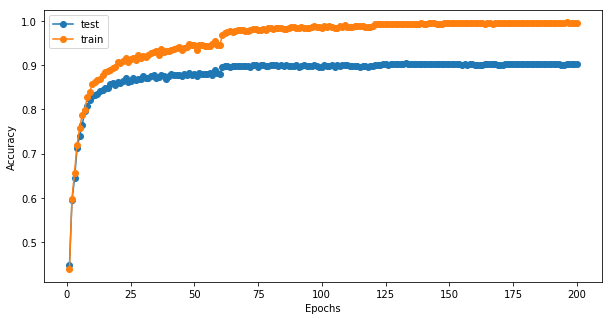

In [19]:
print(np.mean(model_compile.test_acc_list[-10:]))
print(np.mean(model_compile.train_acc_list[-10:]))
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)

Model compile
======

ResNet32

In [22]:
filter_num = 16
number_n = 5
weight_decay = 0.0001
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

# global_step = tf.Variable(0, trainable=False)
# lr = tf.train.exponential_decay(learning_rate = 1e-3,
#                                 global_step = global_step,
#                                 decay_steps = 1000,
#                                 decay_rate= 0.96,
#                                 staircase=True)

global_step = tf.Variable(0, trainable=False)
boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*120), int(5000*num_classes/batch_size*160)]
values = [0.02, 0.004, 0.0008, 0.00016]
lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False)

# optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

Training Model
=======

In [23]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.02



Epoch: 1 Avg_cost: 1.8303598434925081
Test Accuracy:  0.4752999970316887
Train Accuracy:  0.4670999974012375



Epoch: 2 Avg_cost: 1.3982188867330552
Test Accuracy:  0.568999992609024
Train Accuracy:  0.5703999990224838



Epoch: 3 Avg_cost: 1.0992390550374986
Test Accuracy:  0.6799000000953674
Train Accuracy:  0.6930000013113022



Epoch: 4 Avg_cost: 0.9138798539638517
Test Accuracy:  0.7380000001192093
Train Accuracy:  0.7510999995470047



Epoch: 5 Avg_cost: 0.7871389603018767
Test Accuracy:  0.7651999992132187
Train Accuracy:  0.7792999976873398



Epoch: 6 Avg_cost: 0.7031230432987216
Test Accuracy:  0.7818000000715256
Train Accuracy:  0.8004999959468841



Epoch: 7 Avg_cost: 0.6359792110323904
Test Accuracy:  0.8065999972820282
Train Accuracy:  0.8293999963998795



Epoch: 8 Avg_cost: 0.5883155083656312
Test Accuracy:  0.8116999965906143
Train Accuracy:  0.8317999988794327



Epoch: 9 Avg_cost: 0.5616965212821966
Test Accuracy:  0.828099998831749
Train Accuracy:  0.8484999990463257



Epoch: 10 Avg_cost: 0.5212681171298027
Test Accuracy:  0.8290999966859818
Train Accuracy:  0.8534999978542328



Epoch: 11 Avg_cost: 0.4963542473316191
Test Accuracy:  0.8387999993562698
Train Accuracy:  0.8651000010967255



Epoch: 12 Avg_cost: 0.4798148100078108
Test Accuracy:  0.8468999993801117
Train Accuracy:  0.8798000001907349



Epoch: 13 Avg_cost: 0.4627827247679231
Test Accuracy:  0.8453000009059906
Train Accuracy:  0.8829000002145767



Epoch: 14 Avg_cost: 0.4438013153970243
Test Accuracy:  0.8498000001907349
Train Accuracy:  0.8807999974489212



Epoch: 15 Avg_cost: 0.42681553444266296
Test Accuracy:  0.851700000166893
Train Accuracy:  0.8885999995470047



Epoch: 16 Avg_cost: 0.4167459393739702
Test Accuracy:  0.8618999969959259
Train Accuracy:  0.8920000004768371



Epoch: 17 Avg_cost: 0.405637073993683
Test Accuracy:  0.8584999996423721
Train Accuracy:  0.9071000015735626



Epoch: 18 Avg_cost: 0.3921338574588301
Test Accuracy:  0.8638000017404557
Train Accuracy:  0.9020000040531159



Epoch: 19 Avg_cost: 0.38375719001889264
Test Accuracy:  0.8691000008583069
Train Accuracy:  0.9105000030994416



Epoch: 20 Avg_cost: 0.37730617809295647
Test Accuracy:  0.8646000015735626
Train Accuracy:  0.9059000027179718



Epoch: 21 Avg_cost: 0.3661753504872321
Test Accuracy:  0.8644999992847443
Train Accuracy:  0.9053999984264374



Epoch: 22 Avg_cost: 0.3603226811885832
Test Accuracy:  0.8708999985456467
Train Accuracy:  0.9194999992847442



Epoch: 23 Avg_cost: 0.34695672243833564
Test Accuracy:  0.8672999995946884
Train Accuracy:  0.9190000015497207



Epoch: 24 Avg_cost: 0.3447267939150333
Test Accuracy:  0.8700999987125396
Train Accuracy:  0.9175000005960464



Epoch: 25 Avg_cost: 0.33687833461165445
Test Accuracy:  0.8762999993562698
Train Accuracy:  0.9286000043153763



Epoch: 26 Avg_cost: 0.3281924660801887
Test Accuracy:  0.8717999994754791
Train Accuracy:  0.9288000023365021



Epoch: 27 Avg_cost: 0.325920430421829
Test Accuracy:  0.8745000004768372
Train Accuracy:  0.9329000008106232



Epoch: 28 Avg_cost: 0.318876950979233
Test Accuracy:  0.8741000008583069
Train Accuracy:  0.9317000019550323



Epoch: 29 Avg_cost: 0.3216933925747874
Test Accuracy:  0.8707000029087066
Train Accuracy:  0.9283000028133392



Epoch: 30 Avg_cost: 0.31707033070921903
Test Accuracy:  0.8808000004291534
Train Accuracy:  0.9391000050306321



Epoch: 31 Avg_cost: 0.30981075653433787
Test Accuracy:  0.8736999964714051
Train Accuracy:  0.9338000017404556



Epoch: 32 Avg_cost: 0.3003670096993448
Test Accuracy:  0.8803000009059906
Train Accuracy:  0.9415000003576278



Epoch: 33 Avg_cost: 0.30441729140281715
Test Accuracy:  0.8785999983549118
Train Accuracy:  0.9353000038862228



Epoch: 34 Avg_cost: 0.2943259595036505
Test Accuracy:  0.8815000009536743
Train Accuracy:  0.9439000004529953



Epoch: 35 Avg_cost: 0.292792962670326
Test Accuracy:  0.8772000020742416
Train Accuracy:  0.9371000027656555



Epoch: 36 Avg_cost: 0.2875375021994115
Test Accuracy:  0.8766000002622605
Train Accuracy:  0.9392000025510788



Epoch: 37 Avg_cost: 0.2856567003130909
Test Accuracy:  0.8832000005245209
Train Accuracy:  0.9469000029563904



Epoch: 38 Avg_cost: 0.2799282894134521
Test Accuracy:  0.8807000017166138
Train Accuracy:  0.9429000014066696



Epoch: 39 Avg_cost: 0.27997784003615384
Test Accuracy:  0.8805000013113022
Train Accuracy:  0.9395999991893769



Epoch: 40 Avg_cost: 0.27375681009888664
Test Accuracy:  0.8810000014305115
Train Accuracy:  0.9508999991416931



Epoch: 41 Avg_cost: 0.2723974088430405
Test Accuracy:  0.88549999833107
Train Accuracy:  0.9461000025272369



Epoch: 42 Avg_cost: 0.2716592262983325
Test Accuracy:  0.8911000001430511
Train Accuracy:  0.9540000003576279



Epoch: 43 Avg_cost: 0.26993983542919137
Test Accuracy:  0.8833999991416931
Train Accuracy:  0.9487000030279159



Epoch: 44 Avg_cost: 0.2654749491512775
Test Accuracy:  0.885399996638298
Train Accuracy:  0.9484000009298325



Epoch: 45 Avg_cost: 0.27110185122489905
Test Accuracy:  0.8926999998092652
Train Accuracy:  0.95230000436306



Epoch: 46 Avg_cost: 0.26523230311274554
Test Accuracy:  0.8839000004529953
Train Accuracy:  0.9520999997854233



Epoch: 47 Avg_cost: 0.26085830143094063
Test Accuracy:  0.8893999993801117
Train Accuracy:  0.9567999976873398



Epoch: 48 Avg_cost: 0.25877834939956673
Test Accuracy:  0.8849000000953674
Train Accuracy:  0.9533000063896179



Epoch: 49 Avg_cost: 0.2562852067947389
Test Accuracy:  0.8929000008106232
Train Accuracy:  0.9636000043153763



Epoch: 50 Avg_cost: 0.25651923370361296
Test Accuracy:  0.8896999996900559
Train Accuracy:  0.9531000036001206



Epoch: 51 Avg_cost: 0.2540990071892738
Test Accuracy:  0.8870000004768371
Train Accuracy:  0.9595000004768371



Epoch: 52 Avg_cost: 0.245442836433649
Test Accuracy:  0.8898999977111817
Train Accuracy:  0.9611000043153762



Epoch: 53 Avg_cost: 0.2510905008018017
Test Accuracy:  0.8903000009059906
Train Accuracy:  0.9575000017881393



Epoch: 54 Avg_cost: 0.2438014898002148
Test Accuracy:  0.8865999990701675
Train Accuracy:  0.9607000058889389



Epoch: 55 Avg_cost: 0.2559438220560549
Test Accuracy:  0.8866000008583069
Train Accuracy:  0.9564000058174134



Epoch: 56 Avg_cost: 0.25120179226994527
Test Accuracy:  0.8898000025749206
Train Accuracy:  0.9614000016450882



Epoch: 57 Avg_cost: 0.24091835612058618
Test Accuracy:  0.8860000014305115
Train Accuracy:  0.9624000072479248



Epoch: 58 Avg_cost: 0.24571770134568222
Test Accuracy:  0.8898000019788742
Train Accuracy:  0.963400005698204



Epoch: 59 Avg_cost: 0.242012250840664
Test Accuracy:  0.8881000012159348
Train Accuracy:  0.9641000032424927



Epoch: 60 Avg_cost: 0.24416982278227795
Test Accuracy:  0.8857000017166138
Train Accuracy:  0.9627000057697296



Epoch: 61 Avg_cost: 0.19033533957600593
Test Accuracy:  0.9021000015735626
Train Accuracy:  0.9824000126123429



Epoch: 62 Avg_cost: 0.17121571379899972
Test Accuracy:  0.9065000015497208
Train Accuracy:  0.9858000105619431



Epoch: 63 Avg_cost: 0.16649652685225014
Test Accuracy:  0.905900000333786
Train Accuracy:  0.9850000089406967



Epoch: 64 Avg_cost: 0.16013240574300294
Test Accuracy:  0.9056000024080276
Train Accuracy:  0.9878000086545944



Epoch: 65 Avg_cost: 0.1565249934792518
Test Accuracy:  0.9082000023126602
Train Accuracy:  0.988700008392334



Epoch: 66 Avg_cost: 0.15303740787506115
Test Accuracy:  0.9076000010967255
Train Accuracy:  0.9896000081300735



Epoch: 67 Avg_cost: 0.15320079165697087
Test Accuracy:  0.9076000022888183
Train Accuracy:  0.9866000086069107



Epoch: 68 Avg_cost: 0.14832395000755794
Test Accuracy:  0.9064999985694885
Train Accuracy:  0.9911000084877014



Epoch: 69 Avg_cost: 0.14663953562080853
Test Accuracy:  0.9061999988555908
Train Accuracy:  0.9901000076532364



Epoch: 70 Avg_cost: 0.14504208999872203
Test Accuracy:  0.905799999833107
Train Accuracy:  0.9923000073432923



Epoch: 71 Avg_cost: 0.1442021021544933
Test Accuracy:  0.9067000007629394
Train Accuracy:  0.9916000062227249



Epoch: 72 Avg_cost: 0.14385753576457488
Test Accuracy:  0.9052999985218048
Train Accuracy:  0.9910000079870224



Epoch: 73 Avg_cost: 0.14112211041152478
Test Accuracy:  0.906800000667572
Train Accuracy:  0.9908000081777573



Epoch: 74 Avg_cost: 0.13950865086913114
Test Accuracy:  0.9095000016689301
Train Accuracy:  0.9933000057935715



Epoch: 75 Avg_cost: 0.13697050036489963
Test Accuracy:  0.9086000013351441
Train Accuracy:  0.9916000074148178



Epoch: 76 Avg_cost: 0.13558179602026937
Test Accuracy:  0.9071000015735626
Train Accuracy:  0.9923000073432923



Epoch: 77 Avg_cost: 0.13631726604700092
Test Accuracy:  0.9079999989271164
Train Accuracy:  0.9920000064373017



Epoch: 78 Avg_cost: 0.1341278968006372
Test Accuracy:  0.906700000166893
Train Accuracy:  0.9914000076055527



Epoch: 79 Avg_cost: 0.13357617768645286
Test Accuracy:  0.9075000017881394
Train Accuracy:  0.9930000066757202



Epoch: 80 Avg_cost: 0.13279830160737036
Test Accuracy:  0.9057999992370606
Train Accuracy:  0.9930000066757202



Epoch: 81 Avg_cost: 0.13081056673824784
Test Accuracy:  0.9062999999523162
Train Accuracy:  0.9936000061035156



Epoch: 82 Avg_cost: 0.1316348013877869
Test Accuracy:  0.9082000017166137
Train Accuracy:  0.9929000061750411



Epoch: 83 Avg_cost: 0.12927235735952866
Test Accuracy:  0.907600000500679
Train Accuracy:  0.9947000050544739



Epoch: 84 Avg_cost: 0.13045209977030756
Test Accuracy:  0.9065000027418136
Train Accuracy:  0.9927000069618225



Epoch: 85 Avg_cost: 0.1291982153207065
Test Accuracy:  0.9065000021457672
Train Accuracy:  0.9936000061035156



Epoch: 86 Avg_cost: 0.1293013829141855
Test Accuracy:  0.9074000012874603
Train Accuracy:  0.9955000042915344



Epoch: 87 Avg_cost: 0.12630192668735982
Test Accuracy:  0.9086000001430512
Train Accuracy:  0.9946000051498413



Epoch: 88 Avg_cost: 0.1282697567641734
Test Accuracy:  0.9057000023126602
Train Accuracy:  0.9957000041007995



Epoch: 89 Avg_cost: 0.12539244909584515
Test Accuracy:  0.9051000046730041
Train Accuracy:  0.9950000047683716



Epoch: 90 Avg_cost: 0.12400332088768483
Test Accuracy:  0.9101999986171723
Train Accuracy:  0.9940000051259994



Epoch: 91 Avg_cost: 0.1249410221576691
Test Accuracy:  0.9058999997377396
Train Accuracy:  0.9937000060081482



Epoch: 92 Avg_cost: 0.12400077681243418
Test Accuracy:  0.9096000021696091
Train Accuracy:  0.9952000045776367



Epoch: 93 Avg_cost: 0.12434109322726725
Test Accuracy:  0.9088999992609024
Train Accuracy:  0.9939000058174133



Epoch: 94 Avg_cost: 0.12226133547723293
Test Accuracy:  0.9063000023365021
Train Accuracy:  0.9952000045776367



Epoch: 95 Avg_cost: 0.12377341501414783
Test Accuracy:  0.9100000017881393
Train Accuracy:  0.9962000036239624



Epoch: 96 Avg_cost: 0.12243803834915164
Test Accuracy:  0.9108000016212463
Train Accuracy:  0.9952000039815903



Epoch: 97 Avg_cost: 0.12083420130610464
Test Accuracy:  0.9106000006198883
Train Accuracy:  0.9964000034332275



Epoch: 98 Avg_cost: 0.12188383641839037
Test Accuracy:  0.910799999833107
Train Accuracy:  0.994900004863739



Epoch: 99 Avg_cost: 0.1213098708987235
Test Accuracy:  0.9087000012397766
Train Accuracy:  0.9953000044822693



Epoch: 100 Avg_cost: 0.12000484678149234
Test Accuracy:  0.9113999998569489
Train Accuracy:  0.9946000051498413



Epoch: 101 Avg_cost: 0.11890169841051104
Test Accuracy:  0.9093999993801117
Train Accuracy:  0.9946000051498413



Epoch: 102 Avg_cost: 0.11922117213904851
Test Accuracy:  0.9112999993562698
Train Accuracy:  0.9963000035285949



Epoch: 103 Avg_cost: 0.11990881569683551
Test Accuracy:  0.908999999165535
Train Accuracy:  0.9953000044822693



Epoch: 104 Avg_cost: 0.11901850348711004
Test Accuracy:  0.9085000044107437
Train Accuracy:  0.9946000045537948



Epoch: 105 Avg_cost: 0.11953938569128505
Test Accuracy:  0.9089000010490418
Train Accuracy:  0.9945000052452088



Epoch: 106 Avg_cost: 0.11771723200380801
Test Accuracy:  0.9094000023603439
Train Accuracy:  0.9964000034332275



Epoch: 107 Avg_cost: 0.11599478420615199
Test Accuracy:  0.9075
Train Accuracy:  0.9962000036239624



Epoch: 108 Avg_cost: 0.11549535331130027
Test Accuracy:  0.9099000012874603
Train Accuracy:  0.9950000047683716



Epoch: 109 Avg_cost: 0.11273544397950176
Test Accuracy:  0.9083000040054321
Train Accuracy:  0.9955000042915344



Epoch: 110 Avg_cost: 0.11540506643056876
Test Accuracy:  0.9081000018119813
Train Accuracy:  0.9959000039100647



Epoch: 111 Avg_cost: 0.11381382428109647
Test Accuracy:  0.9082000023126602
Train Accuracy:  0.9967000031471253



Epoch: 112 Avg_cost: 0.11352742372453203
Test Accuracy:  0.9069000029563904
Train Accuracy:  0.9949000042676925



Epoch: 113 Avg_cost: 0.11472762042284008
Test Accuracy:  0.9071000045537949
Train Accuracy:  0.9952000039815903



Epoch: 114 Avg_cost: 0.11348480902612212
Test Accuracy:  0.9068000030517578
Train Accuracy:  0.9958000034093857



Epoch: 115 Avg_cost: 0.11412173177301892
Test Accuracy:  0.9066000026464462
Train Accuracy:  0.9968000030517579



Epoch: 116 Avg_cost: 0.11354404811561114
Test Accuracy:  0.9070000040531159
Train Accuracy:  0.9961000037193298



Epoch: 117 Avg_cost: 0.11297344283759579
Test Accuracy:  0.9084000009298324
Train Accuracy:  0.9975000023841858



Epoch: 118 Avg_cost: 0.11335367591679092
Test Accuracy:  0.9088999998569488
Train Accuracy:  0.9965000033378602



Epoch: 119 Avg_cost: 0.11193843799829493
Test Accuracy:  0.9073000013828277
Train Accuracy:  0.9953000044822693



Epoch: 120 Avg_cost: 0.10974156284332275
Test Accuracy:  0.9090000027418137
Train Accuracy:  0.995600004196167



Epoch: 121 Avg_cost: 0.10597318705916406
Test Accuracy:  0.9090000003576278
Train Accuracy:  0.9971000027656555



Epoch: 122 Avg_cost: 0.10563485369086267
Test Accuracy:  0.9112000018358231
Train Accuracy:  0.9981000018119812



Epoch: 123 Avg_cost: 0.10298726102709758
Test Accuracy:  0.9110000014305115
Train Accuracy:  0.997000002861023



Epoch: 124 Avg_cost: 0.10197651664912699
Test Accuracy:  0.910700005888939
Train Accuracy:  0.9981000018119812



Epoch: 125 Avg_cost: 0.10292782942950734
Test Accuracy:  0.9118000042438507
Train Accuracy:  0.9984000015258789



Epoch: 126 Avg_cost: 0.10128350655734544
Test Accuracy:  0.9114000028371811
Train Accuracy:  0.9980000019073486



Epoch: 127 Avg_cost: 0.10176660008728503
Test Accuracy:  0.9112000024318695
Train Accuracy:  0.9984000015258789



Epoch: 128 Avg_cost: 0.10192478905618188
Test Accuracy:  0.9115000021457672
Train Accuracy:  0.9981000018119812



Epoch: 129 Avg_cost: 0.10113477528095244
Test Accuracy:  0.911900002360344
Train Accuracy:  0.9989000010490418



Epoch: 130 Avg_cost: 0.10018396939337244
Test Accuracy:  0.9125000023841858
Train Accuracy:  0.9982000017166137



Epoch: 131 Avg_cost: 0.10057502356171615
Test Accuracy:  0.9124000036716461
Train Accuracy:  0.9987000012397766



Epoch: 132 Avg_cost: 0.09998441109061254
Test Accuracy:  0.9130000042915344
Train Accuracy:  0.9978000020980835



Epoch: 133 Avg_cost: 0.09938754750788205
Test Accuracy:  0.9116000032424927
Train Accuracy:  0.9983000016212463



Epoch: 134 Avg_cost: 0.09959330008924017
Test Accuracy:  0.9125000011920928
Train Accuracy:  0.9987000012397766



Epoch: 135 Avg_cost: 0.10053062213957305
Test Accuracy:  0.9131000006198883
Train Accuracy:  0.9984000015258789



Epoch: 136 Avg_cost: 0.09948974786698817
Test Accuracy:  0.9129000014066696
Train Accuracy:  0.9982000017166137



Epoch: 137 Avg_cost: 0.10056067390739915
Test Accuracy:  0.9119000005722045
Train Accuracy:  0.9981000018119812



Epoch: 138 Avg_cost: 0.09892058327794083
Test Accuracy:  0.9133000016212464
Train Accuracy:  0.9985000014305114



Epoch: 139 Avg_cost: 0.09844832436740393
Test Accuracy:  0.9135000020265579
Train Accuracy:  0.9987000012397766



Epoch: 140 Avg_cost: 0.09855331569910052
Test Accuracy:  0.9123000031709672
Train Accuracy:  0.9981000018119812



Epoch: 141 Avg_cost: 0.09876224549114712
Test Accuracy:  0.913099998831749
Train Accuracy:  0.9983000016212463



Epoch: 142 Avg_cost: 0.0987757061421871
Test Accuracy:  0.9122000020742417
Train Accuracy:  0.9984000015258789



Epoch: 143 Avg_cost: 0.09757895477116107
Test Accuracy:  0.9133000016212464
Train Accuracy:  0.998600001335144



Epoch: 144 Avg_cost: 0.0983820866644383
Test Accuracy:  0.9127000021934509
Train Accuracy:  0.9985000014305114



Epoch: 145 Avg_cost: 0.09700036686658861
Test Accuracy:  0.911900002360344
Train Accuracy:  0.9982000017166137



Epoch: 146 Avg_cost: 0.09766221283376209
Test Accuracy:  0.9121000051498414
Train Accuracy:  0.9984000015258789



Epoch: 147 Avg_cost: 0.09747858473658572
Test Accuracy:  0.9124000018835068
Train Accuracy:  0.9983000016212463



Epoch: 148 Avg_cost: 0.0975874524265528
Test Accuracy:  0.9117000007629394
Train Accuracy:  0.998600001335144



Epoch: 149 Avg_cost: 0.09726502384245385
Test Accuracy:  0.9119000035524368
Train Accuracy:  0.9984000015258789



Epoch: 150 Avg_cost: 0.09683519338071349
Test Accuracy:  0.9131000018119813
Train Accuracy:  0.9990000009536744



Epoch: 151 Avg_cost: 0.09749290041625498
Test Accuracy:  0.911700000166893
Train Accuracy:  0.9980000019073486



Epoch: 152 Avg_cost: 0.09724267283081998
Test Accuracy:  0.9111000019311905
Train Accuracy:  0.9989000010490418



Epoch: 153 Avg_cost: 0.09688504174351686
Test Accuracy:  0.9114999997615815
Train Accuracy:  0.9984000015258789



Epoch: 154 Avg_cost: 0.09677768433094025
Test Accuracy:  0.9111999994516373
Train Accuracy:  0.9995000004768372



Epoch: 155 Avg_cost: 0.09715922354161748
Test Accuracy:  0.9129000014066696
Train Accuracy:  0.9985000014305114



Epoch: 156 Avg_cost: 0.09659544344246379
Test Accuracy:  0.9115000009536743
Train Accuracy:  0.9991000008583069



Epoch: 157 Avg_cost: 0.09589797697961328
Test Accuracy:  0.9125000017881394
Train Accuracy:  0.9990000009536744



Epoch: 158 Avg_cost: 0.09650050906836984
Test Accuracy:  0.9118999999761581
Train Accuracy:  0.9982000017166137



Epoch: 159 Avg_cost: 0.09569216275215145
Test Accuracy:  0.9125999999046326
Train Accuracy:  0.9984000015258789



Epoch: 160 Avg_cost: 0.09562439897656429
Test Accuracy:  0.9112000012397766
Train Accuracy:  0.9994000005722046



Epoch: 161 Avg_cost: 0.09565192972123619
Test Accuracy:  0.9118000030517578
Train Accuracy:  0.9990000009536744



Epoch: 162 Avg_cost: 0.09474569953978061
Test Accuracy:  0.9115000027418136
Train Accuracy:  0.9992000007629395



Epoch: 163 Avg_cost: 0.09540684023499474
Test Accuracy:  0.9114000016450882
Train Accuracy:  0.9989000010490418



Epoch: 164 Avg_cost: 0.09517995050549512
Test Accuracy:  0.9118000024557114
Train Accuracy:  0.9993000006675721



Epoch: 165 Avg_cost: 0.09533682546019552
Test Accuracy:  0.9115000009536743
Train Accuracy:  0.9992000007629395



Epoch: 166 Avg_cost: 0.0949746505320072
Test Accuracy:  0.9118000030517578
Train Accuracy:  0.9990000009536744



Epoch: 167 Avg_cost: 0.09670478680729865
Test Accuracy:  0.9111000031232834
Train Accuracy:  0.9985000014305114



Epoch: 168 Avg_cost: 0.09495395317673687
Test Accuracy:  0.9112000030279159
Train Accuracy:  0.9989000010490418



Epoch: 169 Avg_cost: 0.09541611017286783
Test Accuracy:  0.9112000036239624
Train Accuracy:  0.9990000009536744



Epoch: 170 Avg_cost: 0.09473577076196667
Test Accuracy:  0.9108000022172927
Train Accuracy:  0.9983000016212463



Epoch: 171 Avg_cost: 0.09515179163217545
Test Accuracy:  0.9106000030040741
Train Accuracy:  0.9993000006675721



Epoch: 172 Avg_cost: 0.09484490685164931
Test Accuracy:  0.9117000031471253
Train Accuracy:  0.9991000008583069



Epoch: 173 Avg_cost: 0.09425930190086375
Test Accuracy:  0.9112000018358231
Train Accuracy:  0.9988000011444091



Epoch: 174 Avg_cost: 0.09496339476108553
Test Accuracy:  0.9114000028371811
Train Accuracy:  0.9989000010490418



Epoch: 175 Avg_cost: 0.09504126685857772
Test Accuracy:  0.9118000030517578
Train Accuracy:  0.998600001335144



Epoch: 176 Avg_cost: 0.09539768792688848
Test Accuracy:  0.9117000025510787
Train Accuracy:  0.9992000007629395



Epoch: 177 Avg_cost: 0.09510834628343587
Test Accuracy:  0.9112000030279159
Train Accuracy:  0.998600001335144



Epoch: 178 Avg_cost: 0.09494882555305953
Test Accuracy:  0.9115000033378601
Train Accuracy:  0.9987000012397766



Epoch: 179 Avg_cost: 0.0954190571904182
Test Accuracy:  0.911300003528595
Train Accuracy:  0.9984000015258789



Epoch: 180 Avg_cost: 0.09442629094421869
Test Accuracy:  0.9115000033378601
Train Accuracy:  0.9987000012397766



Epoch: 181 Avg_cost: 0.09449890606105332
Test Accuracy:  0.9118000030517578
Train Accuracy:  0.9996000003814697



Epoch: 182 Avg_cost: 0.09396693176031115
Test Accuracy:  0.9109000045061112
Train Accuracy:  0.9990000009536744



Epoch: 183 Avg_cost: 0.09408922903239718
Test Accuracy:  0.9111000031232834
Train Accuracy:  0.9994000005722046



Epoch: 184 Avg_cost: 0.09545825287699701
Test Accuracy:  0.9105000025033951
Train Accuracy:  0.9992000007629395



Epoch: 185 Avg_cost: 0.09485389363765717
Test Accuracy:  0.911300003528595
Train Accuracy:  0.9992000007629395



Epoch: 186 Avg_cost: 0.0947582188248635
Test Accuracy:  0.911000002026558
Train Accuracy:  0.9991000008583069



Epoch: 187 Avg_cost: 0.09457690010964874
Test Accuracy:  0.9106000024080276
Train Accuracy:  0.9989000010490418



Epoch: 188 Avg_cost: 0.09515295630693431
Test Accuracy:  0.9117000025510787
Train Accuracy:  0.9990000009536744



Epoch: 189 Avg_cost: 0.09408725003898141
Test Accuracy:  0.9120000022649765
Train Accuracy:  0.9991000008583069



Epoch: 190 Avg_cost: 0.09490271617472171
Test Accuracy:  0.9112000018358231
Train Accuracy:  0.9992000007629395



Epoch: 191 Avg_cost: 0.09390864780545237
Test Accuracy:  0.9108000028133393
Train Accuracy:  0.9994000005722046



Epoch: 192 Avg_cost: 0.09405146120488656
Test Accuracy:  0.9116000032424927
Train Accuracy:  0.9989000010490418



Epoch: 193 Avg_cost: 0.09356124091148377
Test Accuracy:  0.9115000021457672
Train Accuracy:  0.9990000009536744



Epoch: 194 Avg_cost: 0.09427453269064437
Test Accuracy:  0.9118000030517578
Train Accuracy:  0.9987000012397766



Epoch: 195 Avg_cost: 0.09420142747461793
Test Accuracy:  0.9114000034332276
Train Accuracy:  0.9992000007629395



Epoch: 196 Avg_cost: 0.09366874027252191
Test Accuracy:  0.9116000032424927
Train Accuracy:  0.998600001335144



Epoch: 197 Avg_cost: 0.09434540176391597
Test Accuracy:  0.9115000033378601
Train Accuracy:  0.9989000010490418



Epoch: 198 Avg_cost: 0.09394298750162118
Test Accuracy:  0.9112000030279159
Train Accuracy:  0.9984000015258789



Epoch: 199 Avg_cost: 0.09434912264347077
Test Accuracy:  0.911900002360344
Train Accuracy:  0.9991000008583069



Epoch: 200 Avg_cost: 0.09385860614478594
Test Accuracy:  0.9112000024318695
Train Accuracy:  0.9992000007629395
200 epoch done
last learning rate: 0.00016


Saving model
=======

In [24]:
import time
import os
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "ResNet32_{}\ResNet32_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

'model\\ResNet32_2019_11_28_17_40\\ResNet32_2019_11_28_17_40'

Showing accuracy graph
======

0.9114500029087067
0.9989400010108949


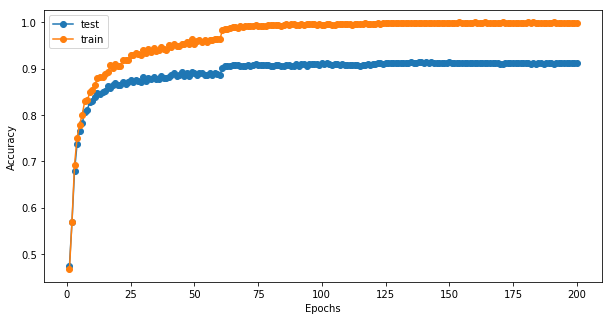

In [25]:
print(np.mean(model_compile.test_acc_list[-10:]))
print(np.mean(model_compile.train_acc_list[-10:]))
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)

Model compile
======

ResNet110

In [26]:
filter_num = 16
number_n = 18
weight_decay = 0.0001
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

# global_step = tf.Variable(0, trainable=False)
# lr = tf.train.exponential_decay(learning_rate = 1e-3,
#                                 global_step = global_step,
#                                 decay_steps = 1000,
#                                 decay_rate= 0.96,
#                                 staircase=True)

global_step = tf.Variable(0, trainable=False)
boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*120), int(5000*num_classes/batch_size*160)]
values = [0.02, 0.004, 0.0008, 0.00016]
lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False)

# optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

Training Model
=======

In [27]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.02



Epoch: 1 Avg_cost: 2.3349033315181726
Test Accuracy:  0.3718999993801117
Train Accuracy:  0.3788999992609024



Epoch: 2 Avg_cost: 1.6987830631732939
Test Accuracy:  0.44779999762773515
Train Accuracy:  0.45099999755620956



Epoch: 3 Avg_cost: 1.3831788092851636
Test Accuracy:  0.5912999972701073
Train Accuracy:  0.6046999981999397



Epoch: 4 Avg_cost: 1.1596076214313518
Test Accuracy:  0.6603000003099442
Train Accuracy:  0.6734000027179718



Epoch: 5 Avg_cost: 1.002247329831123
Test Accuracy:  0.7174000042676926
Train Accuracy:  0.7205000025033951



Epoch: 6 Avg_cost: 0.9004945802688593
Test Accuracy:  0.7426999968290329
Train Accuracy:  0.7561000001430511



Epoch: 7 Avg_cost: 0.7965570962429052
Test Accuracy:  0.7703000009059906
Train Accuracy:  0.7876999950408936



Epoch: 8 Avg_cost: 0.7228873859643934
Test Accuracy:  0.7874999976158142
Train Accuracy:  0.8057999980449676



Epoch: 9 Avg_cost: 0.6716195881962784
Test Accuracy:  0.8071999967098236
Train Accuracy:  0.8296999984979629



Epoch: 10 Avg_cost: 0.6361395039558414
Test Accuracy:  0.8233999967575073
Train Accuracy:  0.8486000025272369



Epoch: 11 Avg_cost: 0.5920285929441451
Test Accuracy:  0.820799998641014
Train Accuracy:  0.8505000025033951



Epoch: 12 Avg_cost: 0.5613893422484394
Test Accuracy:  0.8209999990463257
Train Accuracy:  0.8509999984502792



Epoch: 13 Avg_cost: 0.5357615815997122
Test Accuracy:  0.8421999990940094
Train Accuracy:  0.8652999979257584



Epoch: 14 Avg_cost: 0.5107563124895098
Test Accuracy:  0.841800001859665
Train Accuracy:  0.8807000011205673



Epoch: 15 Avg_cost: 0.49436224079132074
Test Accuracy:  0.8475
Train Accuracy:  0.8870999985933303



Epoch: 16 Avg_cost: 0.4767273043394087
Test Accuracy:  0.8494999969005584
Train Accuracy:  0.888299999833107



Epoch: 17 Avg_cost: 0.45651096862554524
Test Accuracy:  0.8652000027894974
Train Accuracy:  0.9038000053167343



Epoch: 18 Avg_cost: 0.44268860480189315
Test Accuracy:  0.8550999987125397
Train Accuracy:  0.8994000023603439



Epoch: 19 Avg_cost: 0.4264404682219034
Test Accuracy:  0.8609000021219253
Train Accuracy:  0.9123000013828277



Epoch: 20 Avg_cost: 0.4140717255473139
Test Accuracy:  0.8631999999284744
Train Accuracy:  0.9143000012636184



Epoch: 21 Avg_cost: 0.4068691859543328
Test Accuracy:  0.865900000333786
Train Accuracy:  0.9197000026702881



Epoch: 22 Avg_cost: 0.38759970629215246
Test Accuracy:  0.8704999995231628
Train Accuracy:  0.9183000010251999



Epoch: 23 Avg_cost: 0.3817739742696285
Test Accuracy:  0.8737000006437302
Train Accuracy:  0.9299000024795532



Epoch: 24 Avg_cost: 0.36909691262245187
Test Accuracy:  0.8707999986410141
Train Accuracy:  0.9269000017642974



Epoch: 25 Avg_cost: 0.36224388679862024
Test Accuracy:  0.8789999985694885
Train Accuracy:  0.9354999995231629



Epoch: 26 Avg_cost: 0.35751494351029406
Test Accuracy:  0.8860000008344651
Train Accuracy:  0.946000000834465



Epoch: 27 Avg_cost: 0.3511320382356641
Test Accuracy:  0.8841999989748001
Train Accuracy:  0.9409999996423721



Epoch: 28 Avg_cost: 0.3400815442204477
Test Accuracy:  0.8781000006198884
Train Accuracy:  0.9336999982595444



Epoch: 29 Avg_cost: 0.3349488774836067
Test Accuracy:  0.8858000034093857
Train Accuracy:  0.9493000018596649



Epoch: 30 Avg_cost: 0.3279002555012703
Test Accuracy:  0.8811000019311905
Train Accuracy:  0.9422000014781952



Epoch: 31 Avg_cost: 0.3161064319014551
Test Accuracy:  0.8878000015020371
Train Accuracy:  0.9444999998807907



Epoch: 32 Avg_cost: 0.3079547082483765
Test Accuracy:  0.8836000049114228
Train Accuracy:  0.9497000014781952



Epoch: 33 Avg_cost: 0.30760702282190316
Test Accuracy:  0.8822000008821488
Train Accuracy:  0.9499000024795532



Epoch: 34 Avg_cost: 0.3069864071309569
Test Accuracy:  0.8896000003814697
Train Accuracy:  0.9527000039815903



Epoch: 35 Avg_cost: 0.29516920414566994
Test Accuracy:  0.8863999992609024
Train Accuracy:  0.9541000044345855



Epoch: 36 Avg_cost: 0.2911424639821051
Test Accuracy:  0.8851000016927719
Train Accuracy:  0.9583000040054321



Epoch: 37 Avg_cost: 0.28973859658837336
Test Accuracy:  0.8848000001907349
Train Accuracy:  0.9559000039100647



Epoch: 38 Avg_cost: 0.29436758783459654
Test Accuracy:  0.8966000026464462
Train Accuracy:  0.9628000050783158



Epoch: 39 Avg_cost: 0.2838804758191106
Test Accuracy:  0.8860000044107437
Train Accuracy:  0.9633000057935714



Epoch: 40 Avg_cost: 0.27768765464425105
Test Accuracy:  0.8912999987602234
Train Accuracy:  0.9685000044107437



Epoch: 41 Avg_cost: 0.2734028044939044
Test Accuracy:  0.8930000025033951
Train Accuracy:  0.963300005197525



Epoch: 42 Avg_cost: 0.26835750579834017
Test Accuracy:  0.895599998831749
Train Accuracy:  0.9731000101566315



Epoch: 43 Avg_cost: 0.27106666821241365
Test Accuracy:  0.8981000000238418
Train Accuracy:  0.9726000082492828



Epoch: 44 Avg_cost: 0.265330868959427
Test Accuracy:  0.8847999984025955
Train Accuracy:  0.9630000042915344



Epoch: 45 Avg_cost: 0.2656586943864821
Test Accuracy:  0.8903000009059906
Train Accuracy:  0.9650000059604644



Epoch: 46 Avg_cost: 0.2634600148797034
Test Accuracy:  0.8925999987125397
Train Accuracy:  0.9718000066280365



Epoch: 47 Avg_cost: 0.2623188693821431
Test Accuracy:  0.8944000005722046
Train Accuracy:  0.9714000099897384



Epoch: 48 Avg_cost: 0.2560099554657937
Test Accuracy:  0.8933000004291535
Train Accuracy:  0.9699000066518784



Epoch: 49 Avg_cost: 0.2574619545042515
Test Accuracy:  0.8912999987602234
Train Accuracy:  0.9713000100851059



Epoch: 50 Avg_cost: 0.2488798836171626
Test Accuracy:  0.8950000029802322
Train Accuracy:  0.9729000103473663



Epoch: 51 Avg_cost: 0.24916239881515492
Test Accuracy:  0.8901000016927719
Train Accuracy:  0.9685000050067901



Epoch: 52 Avg_cost: 0.24703870493173602
Test Accuracy:  0.8986000013351441
Train Accuracy:  0.9752000111341477



Epoch: 53 Avg_cost: 0.2455149382650853
Test Accuracy:  0.8987000018358231
Train Accuracy:  0.9768000108003616



Epoch: 54 Avg_cost: 0.24371293303370486
Test Accuracy:  0.8962999987602234
Train Accuracy:  0.9818000108003616



Epoch: 55 Avg_cost: 0.2432978655397892
Test Accuracy:  0.8958999985456466
Train Accuracy:  0.9722000080347061



Epoch: 56 Avg_cost: 0.24389350655674932
Test Accuracy:  0.8958000010251999
Train Accuracy:  0.9768000108003616



Epoch: 57 Avg_cost: 0.2385887363553047
Test Accuracy:  0.9008000010251999
Train Accuracy:  0.9819000089168548



Epoch: 58 Avg_cost: 0.23575940674543355
Test Accuracy:  0.8935999983549118
Train Accuracy:  0.9768000096082687



Epoch: 59 Avg_cost: 0.23539765608310706
Test Accuracy:  0.897600000500679
Train Accuracy:  0.980800011754036



Epoch: 60 Avg_cost: 0.2326947089135648
Test Accuracy:  0.9010000032186508
Train Accuracy:  0.9824000078439713



Epoch: 61 Avg_cost: 0.18551138731837255
Test Accuracy:  0.9117000007629394
Train Accuracy:  0.9933000057935715



Epoch: 62 Avg_cost: 0.16999157997965803
Test Accuracy:  0.9129000002145767
Train Accuracy:  0.9939000052213669



Epoch: 63 Avg_cost: 0.16613220828771602
Test Accuracy:  0.913500000834465
Train Accuracy:  0.9955000042915344



Epoch: 64 Avg_cost: 0.16219006586074827
Test Accuracy:  0.9147000002861023
Train Accuracy:  0.9961000037193298



Epoch: 65 Avg_cost: 0.15995612567663192
Test Accuracy:  0.9126999998092651
Train Accuracy:  0.9976000022888184



Epoch: 66 Avg_cost: 0.15583025485277172
Test Accuracy:  0.9156999999284744
Train Accuracy:  0.9961000037193298



Epoch: 67 Avg_cost: 0.15515196675062173
Test Accuracy:  0.9161000019311905
Train Accuracy:  0.9972000026702881



Epoch: 68 Avg_cost: 0.15516272488236443
Test Accuracy:  0.916000000834465
Train Accuracy:  0.9973000025749207



Epoch: 69 Avg_cost: 0.1513497177362442
Test Accuracy:  0.9154000002145767
Train Accuracy:  0.9973000025749207



Epoch: 70 Avg_cost: 0.15310380867123602
Test Accuracy:  0.9171999996900558
Train Accuracy:  0.9984000015258789



Epoch: 71 Avg_cost: 0.15039056864380826
Test Accuracy:  0.9180000025033951
Train Accuracy:  0.9984000015258789



Epoch: 72 Avg_cost: 0.1495362257957458
Test Accuracy:  0.9161999982595443
Train Accuracy:  0.997000002861023



Epoch: 73 Avg_cost: 0.149313271611929
Test Accuracy:  0.9183999991416931
Train Accuracy:  0.9981000018119812



Epoch: 74 Avg_cost: 0.14901362010836594
Test Accuracy:  0.91780000269413
Train Accuracy:  0.9978000020980835



Epoch: 75 Avg_cost: 0.14763027420639982
Test Accuracy:  0.9160999995470047
Train Accuracy:  0.9982000017166137



Epoch: 76 Avg_cost: 0.14510888651013373
Test Accuracy:  0.9166000014543534
Train Accuracy:  0.9984000015258789



Epoch: 77 Avg_cost: 0.1445126456320285
Test Accuracy:  0.9162000000476838
Train Accuracy:  0.9983000016212463



Epoch: 78 Avg_cost: 0.14383274525403975
Test Accuracy:  0.9158000010251999
Train Accuracy:  0.9979000020027161



Epoch: 79 Avg_cost: 0.1420717470049859
Test Accuracy:  0.9162999999523163
Train Accuracy:  0.9987000012397766



Epoch: 80 Avg_cost: 0.14175443613529218
Test Accuracy:  0.9154000037908554
Train Accuracy:  0.9988000011444091



Epoch: 81 Avg_cost: 0.1417235593199729
Test Accuracy:  0.9162999987602234
Train Accuracy:  0.998600001335144



Epoch: 82 Avg_cost: 0.14110630708932864
Test Accuracy:  0.9180000001192092
Train Accuracy:  0.9992000007629395



Epoch: 83 Avg_cost: 0.13994410336017593
Test Accuracy:  0.9179999995231628
Train Accuracy:  0.9992000007629395



Epoch: 84 Avg_cost: 0.13792783388495458
Test Accuracy:  0.9181000024080277
Train Accuracy:  0.9988000011444091



Epoch: 85 Avg_cost: 0.13836444780230528
Test Accuracy:  0.9149000036716461
Train Accuracy:  0.9991000008583069



Epoch: 86 Avg_cost: 0.1380165706872939
Test Accuracy:  0.9180000048875808
Train Accuracy:  0.998600001335144



Epoch: 87 Avg_cost: 0.13879556843638421
Test Accuracy:  0.9170000010728836
Train Accuracy:  0.9996000003814697



Epoch: 88 Avg_cost: 0.13740652796626093
Test Accuracy:  0.9148000025749207
Train Accuracy:  0.9991000008583069



Epoch: 89 Avg_cost: 0.13747238111495977
Test Accuracy:  0.9148000013828278
Train Accuracy:  0.9980000019073486



Epoch: 90 Avg_cost: 0.1360786679089069
Test Accuracy:  0.9150999993085861
Train Accuracy:  0.9985000014305114



Epoch: 91 Avg_cost: 0.1361774151623248
Test Accuracy:  0.9146000027656556
Train Accuracy:  0.9988000011444091



Epoch: 92 Avg_cost: 0.13461685448884977
Test Accuracy:  0.9157000017166138
Train Accuracy:  0.9991000008583069



Epoch: 93 Avg_cost: 0.13390894904732714
Test Accuracy:  0.9156000006198883
Train Accuracy:  0.9989000010490418



Epoch: 94 Avg_cost: 0.13281202277541163
Test Accuracy:  0.9153000009059906
Train Accuracy:  0.9993000006675721



Epoch: 95 Avg_cost: 0.1336362691223621
Test Accuracy:  0.9160000026226044
Train Accuracy:  0.9988000011444091



Epoch: 96 Avg_cost: 0.1325562237799168
Test Accuracy:  0.9163000029325485
Train Accuracy:  0.9990000009536744



Epoch: 97 Avg_cost: 0.13142257872223845
Test Accuracy:  0.9182000023126602
Train Accuracy:  0.9994000005722046



Epoch: 98 Avg_cost: 0.13195357376337047
Test Accuracy:  0.9158999985456466
Train Accuracy:  0.9984000015258789



Epoch: 99 Avg_cost: 0.13060752919316293
Test Accuracy:  0.9175000011920929
Train Accuracy:  0.9989000010490418



Epoch: 100 Avg_cost: 0.13027715736627568
Test Accuracy:  0.9145999991893768
Train Accuracy:  0.9978000020980835



Epoch: 101 Avg_cost: 0.12911293947696686
Test Accuracy:  0.916000000834465
Train Accuracy:  0.9989000010490418



Epoch: 102 Avg_cost: 0.12927332006394865
Test Accuracy:  0.915900000333786
Train Accuracy:  0.9990000009536744



Epoch: 103 Avg_cost: 0.12926672619581206
Test Accuracy:  0.9165000015497208
Train Accuracy:  0.9992000007629395



Epoch: 104 Avg_cost: 0.1280193548202515
Test Accuracy:  0.9162000006437302
Train Accuracy:  0.9991000008583069



Epoch: 105 Avg_cost: 0.1265882397443056
Test Accuracy:  0.9167000013589859
Train Accuracy:  0.9992000007629395



Epoch: 106 Avg_cost: 0.12766637209057816
Test Accuracy:  0.9144999998807907
Train Accuracy:  0.9991000008583069



Epoch: 107 Avg_cost: 0.12767703355848775
Test Accuracy:  0.9181000030040741
Train Accuracy:  0.9995000004768372



Epoch: 108 Avg_cost: 0.12608603608608238
Test Accuracy:  0.9170999991893768
Train Accuracy:  0.9990000009536744



Epoch: 109 Avg_cost: 0.1264831807166337
Test Accuracy:  0.9162999987602234
Train Accuracy:  0.9989000010490418



Epoch: 110 Avg_cost: 0.12505492822825914
Test Accuracy:  0.9152999973297119
Train Accuracy:  0.9994000005722046



Epoch: 111 Avg_cost: 0.12416730551421637
Test Accuracy:  0.9142000013589859
Train Accuracy:  0.9993000006675721



Epoch: 112 Avg_cost: 0.1247808869928121
Test Accuracy:  0.9145000010728837
Train Accuracy:  0.9989000010490418



Epoch: 113 Avg_cost: 0.12433002087473861
Test Accuracy:  0.9148000007867814
Train Accuracy:  0.9988000011444091



Epoch: 114 Avg_cost: 0.12340673343837247
Test Accuracy:  0.9157999992370606
Train Accuracy:  0.9993000006675721



Epoch: 115 Avg_cost: 0.1217405211031437
Test Accuracy:  0.9190000027418137
Train Accuracy:  0.9993000006675721



Epoch: 116 Avg_cost: 0.12196072012186043
Test Accuracy:  0.9176000010967255
Train Accuracy:  0.9997000002861023



Epoch: 117 Avg_cost: 0.12239540283381943
Test Accuracy:  0.9178000032901764
Train Accuracy:  0.9990000009536744



Epoch: 118 Avg_cost: 0.12269465598464013
Test Accuracy:  0.9153000009059906
Train Accuracy:  0.9992000007629395



Epoch: 119 Avg_cost: 0.12150431273877645
Test Accuracy:  0.9196000027656556
Train Accuracy:  0.9991000008583069



Epoch: 120 Avg_cost: 0.12102278606593607
Test Accuracy:  0.9159000033140182
Train Accuracy:  0.9996000003814697



Epoch: 121 Avg_cost: 0.11984027287363987
Test Accuracy:  0.9166000020503998
Train Accuracy:  0.9996000003814697



Epoch: 122 Avg_cost: 0.11938109233975415
Test Accuracy:  0.9172000008821487
Train Accuracy:  0.9999000000953674



Epoch: 123 Avg_cost: 0.11769013160467148
Test Accuracy:  0.9172000026702881
Train Accuracy:  0.9997000002861023



Epoch: 124 Avg_cost: 0.11804951635003094
Test Accuracy:  0.9174000018835068
Train Accuracy:  0.9996000003814697



Epoch: 125 Avg_cost: 0.11748240759968762
Test Accuracy:  0.9179000002145767
Train Accuracy:  0.9994000005722046



Epoch: 126 Avg_cost: 0.11690749278664588
Test Accuracy:  0.91700000166893
Train Accuracy:  0.9999000000953674



Epoch: 127 Avg_cost: 0.11729253298044198
Test Accuracy:  0.9178000020980835
Train Accuracy:  0.9995000004768372



Epoch: 128 Avg_cost: 0.117612559273839
Test Accuracy:  0.918500000834465
Train Accuracy:  0.9997000002861023



Epoch: 129 Avg_cost: 0.1170985184907913
Test Accuracy:  0.9179000008106232
Train Accuracy:  0.9998000001907349



Epoch: 130 Avg_cost: 0.11625928062200545
Test Accuracy:  0.9191000002622605
Train Accuracy:  0.9996000003814697



Epoch: 131 Avg_cost: 0.116254055187106
Test Accuracy:  0.9180000007152558
Train Accuracy:  0.9998000001907349



Epoch: 132 Avg_cost: 0.1165879747569562
Test Accuracy:  0.9188000005483627
Train Accuracy:  0.9999000000953674



Epoch: 133 Avg_cost: 0.11612636607885352
Test Accuracy:  0.920100001692772
Train Accuracy:  1.0



Epoch: 134 Avg_cost: 0.11604278786480428
Test Accuracy:  0.918600002527237
Train Accuracy:  0.9998000001907349



Epoch: 135 Avg_cost: 0.11535302342474467
Test Accuracy:  0.9190000027418137
Train Accuracy:  1.0



Epoch: 136 Avg_cost: 0.11635094945132726
Test Accuracy:  0.9192000025510788
Train Accuracy:  0.9999000000953674



Epoch: 137 Avg_cost: 0.11561413295567034
Test Accuracy:  0.9196000015735626
Train Accuracy:  0.9996000003814697



Epoch: 138 Avg_cost: 0.11571603049337865
Test Accuracy:  0.9189000016450882
Train Accuracy:  1.0



Epoch: 139 Avg_cost: 0.11534696421027184
Test Accuracy:  0.9183999997377396
Train Accuracy:  0.9995000004768372



Epoch: 140 Avg_cost: 0.11493554493784901
Test Accuracy:  0.9198000001907348
Train Accuracy:  0.9998000001907349



Epoch: 141 Avg_cost: 0.11508377616107453
Test Accuracy:  0.9191000020503998
Train Accuracy:  0.9999000000953674



Epoch: 142 Avg_cost: 0.1148752776235342
Test Accuracy:  0.9180000013113022
Train Accuracy:  0.9999000000953674



Epoch: 143 Avg_cost: 0.11517218230664732
Test Accuracy:  0.918500000834465
Train Accuracy:  0.9999000000953674



Epoch: 144 Avg_cost: 0.11465033397078517
Test Accuracy:  0.918099998831749
Train Accuracy:  0.9999000000953674



Epoch: 145 Avg_cost: 0.11465617448091522
Test Accuracy:  0.9184000021219254
Train Accuracy:  0.9998000001907349



Epoch: 146 Avg_cost: 0.1146863147467375
Test Accuracy:  0.9188000011444092
Train Accuracy:  0.9997000002861023



Epoch: 147 Avg_cost: 0.1145778635591269
Test Accuracy:  0.9183000004291535
Train Accuracy:  0.9999000000953674



Epoch: 148 Avg_cost: 0.11409505267441274
Test Accuracy:  0.9190000003576279
Train Accuracy:  0.9999000000953674



Epoch: 149 Avg_cost: 0.11399704615771775
Test Accuracy:  0.9185000014305115
Train Accuracy:  0.9997000002861023



Epoch: 150 Avg_cost: 0.11410086640715605
Test Accuracy:  0.918700001835823
Train Accuracy:  0.9997000002861023



Epoch: 151 Avg_cost: 0.11411946550011635
Test Accuracy:  0.918600002527237
Train Accuracy:  0.9997000002861023



Epoch: 152 Avg_cost: 0.11383075302839278
Test Accuracy:  0.9185000026226043
Train Accuracy:  0.9999000000953674



Epoch: 153 Avg_cost: 0.11415843640267848
Test Accuracy:  0.9185000014305115
Train Accuracy:  0.9998000001907349



Epoch: 154 Avg_cost: 0.11368476308882249
Test Accuracy:  0.9190000003576279
Train Accuracy:  0.9999000000953674



Epoch: 155 Avg_cost: 0.11340105105936539
Test Accuracy:  0.9191000014543533
Train Accuracy:  0.9999000000953674



Epoch: 156 Avg_cost: 0.11346711617708201
Test Accuracy:  0.9182000029087066
Train Accuracy:  0.9999000000953674



Epoch: 157 Avg_cost: 0.1135833312124014
Test Accuracy:  0.9184000033140183
Train Accuracy:  0.9999000000953674



Epoch: 158 Avg_cost: 0.11298367811739442
Test Accuracy:  0.9183000010251999
Train Accuracy:  0.9998000001907349



Epoch: 159 Avg_cost: 0.11330048537254336
Test Accuracy:  0.918700003027916
Train Accuracy:  0.9997000002861023



Epoch: 160 Avg_cost: 0.11331177768111234
Test Accuracy:  0.9195000034570694
Train Accuracy:  0.9998000001907349



Epoch: 161 Avg_cost: 0.1129516210556031
Test Accuracy:  0.9195000022649765
Train Accuracy:  0.9998000001907349



Epoch: 162 Avg_cost: 0.11319970732927324
Test Accuracy:  0.9193000030517579
Train Accuracy:  0.9995000004768372



Epoch: 163 Avg_cost: 0.11313494333624831
Test Accuracy:  0.9191000026464462
Train Accuracy:  0.9999000000953674



Epoch: 164 Avg_cost: 0.11271277792751788
Test Accuracy:  0.9193000030517579
Train Accuracy:  1.0



Epoch: 165 Avg_cost: 0.11266505663096905
Test Accuracy:  0.9192000025510788
Train Accuracy:  0.9999000000953674



Epoch: 166 Avg_cost: 0.11254426130652428
Test Accuracy:  0.9193000042438507
Train Accuracy:  1.0



Epoch: 167 Avg_cost: 0.113231302216649
Test Accuracy:  0.9193000036478043
Train Accuracy:  0.9999000000953674



Epoch: 168 Avg_cost: 0.11260634781420234
Test Accuracy:  0.9195000040531158
Train Accuracy:  0.9997000002861023



Epoch: 169 Avg_cost: 0.11273446682095528
Test Accuracy:  0.9197000032663345
Train Accuracy:  0.9999000000953674



Epoch: 170 Avg_cost: 0.11249123266339305
Test Accuracy:  0.9197000032663345
Train Accuracy:  1.0



Epoch: 171 Avg_cost: 0.11264918805658795
Test Accuracy:  0.9198000025749207
Train Accuracy:  0.9998000001907349



Epoch: 172 Avg_cost: 0.11236290836334224
Test Accuracy:  0.9199000024795532
Train Accuracy:  0.9998000001907349



Epoch: 173 Avg_cost: 0.11275507502257824
Test Accuracy:  0.9199000036716461
Train Accuracy:  0.9998000001907349



Epoch: 174 Avg_cost: 0.11288339041173456
Test Accuracy:  0.920400003194809
Train Accuracy:  0.9998000001907349



Epoch: 175 Avg_cost: 0.1124941616505384
Test Accuracy:  0.9199000018835067
Train Accuracy:  0.9998000001907349



Epoch: 176 Avg_cost: 0.11243734955787663
Test Accuracy:  0.9201000040769577
Train Accuracy:  0.9998000001907349



Epoch: 177 Avg_cost: 0.11276780764758587
Test Accuracy:  0.9202000039815903
Train Accuracy:  0.9999000000953674



Epoch: 178 Avg_cost: 0.11257399150729182
Test Accuracy:  0.9201000040769577
Train Accuracy:  0.9999000000953674



Epoch: 179 Avg_cost: 0.11285288810729993
Test Accuracy:  0.920500003695488
Train Accuracy:  0.9998000001907349



Epoch: 180 Avg_cost: 0.11246313129365454
Test Accuracy:  0.9203000044822693
Train Accuracy:  0.9999000000953674



Epoch: 181 Avg_cost: 0.11275585819780823
Test Accuracy:  0.9203000038862228
Train Accuracy:  0.9998000001907349



Epoch: 182 Avg_cost: 0.11225092579424382
Test Accuracy:  0.920400003194809
Train Accuracy:  0.9999000000953674



Epoch: 183 Avg_cost: 0.11241140985488889
Test Accuracy:  0.9209000033140182
Train Accuracy:  0.9999000000953674



Epoch: 184 Avg_cost: 0.11259547622501856
Test Accuracy:  0.9207000029087067
Train Accuracy:  1.0



Epoch: 185 Avg_cost: 0.11274366034567357
Test Accuracy:  0.9203000032901764
Train Accuracy:  0.9999000000953674



Epoch: 186 Avg_cost: 0.11255187039077286
Test Accuracy:  0.9205000030994416
Train Accuracy:  1.0



Epoch: 187 Avg_cost: 0.11234542931616287
Test Accuracy:  0.9203000032901764
Train Accuracy:  0.9999000000953674



Epoch: 188 Avg_cost: 0.11255135935544963
Test Accuracy:  0.9200000041723251
Train Accuracy:  0.9999000000953674



Epoch: 189 Avg_cost: 0.11231586378812791
Test Accuracy:  0.919500002861023
Train Accuracy:  0.9998000001907349



Epoch: 190 Avg_cost: 0.11214471580088146
Test Accuracy:  0.9194000035524368
Train Accuracy:  0.9999000000953674



Epoch: 191 Avg_cost: 0.11215765714645387
Test Accuracy:  0.9193000030517579
Train Accuracy:  0.9999000000953674



Epoch: 192 Avg_cost: 0.11233758677542217
Test Accuracy:  0.9189000022411347
Train Accuracy:  0.9999000000953674



Epoch: 193 Avg_cost: 0.11182156248390669
Test Accuracy:  0.9190000015497207
Train Accuracy:  0.9999000000953674



Epoch: 194 Avg_cost: 0.11208870212733733
Test Accuracy:  0.9195000016689301
Train Accuracy:  0.9999000000953674



Epoch: 195 Avg_cost: 0.11209893386065957
Test Accuracy:  0.9194000029563903
Train Accuracy:  0.9998000001907349



Epoch: 196 Avg_cost: 0.1122824885100125
Test Accuracy:  0.9196000027656556
Train Accuracy:  0.9999000000953674



Epoch: 197 Avg_cost: 0.11219491070508956
Test Accuracy:  0.9201000028848648
Train Accuracy:  1.0



Epoch: 198 Avg_cost: 0.11213807910680763
Test Accuracy:  0.9199000024795532
Train Accuracy:  0.9998000001907349



Epoch: 199 Avg_cost: 0.1122439126670361
Test Accuracy:  0.9201000022888184
Train Accuracy:  0.9999000000953674



Epoch: 200 Avg_cost: 0.11229139423370357
Test Accuracy:  0.9200000023841858
Train Accuracy:  0.9998000001907349
200 epoch done
last learning rate: 0.00016


Saving model
=======

In [28]:
import time
import os
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "ResNet110_{}\ResNet110_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

'model\\ResNet110_2019_11_29_08_40\\ResNet110_2019_11_29_08_40'

Showing accuracy graph
======

0.919580002427101
0.999880000114441


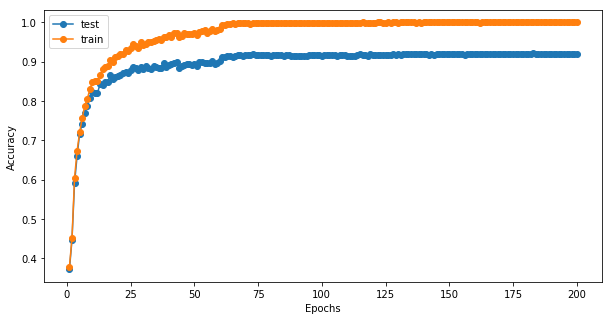

In [29]:
print(np.mean(model_compile.test_acc_list[-10:]))
print(np.mean(model_compile.train_acc_list[-10:]))
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)

Wide ResNet
=========

WRN-16-10

In [30]:
filter_num = 16*10
number_n = 2
weight_decay = 0.0005
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

# global_step = tf.Variable(0, trainable=False)
# lr = tf.train.exponential_decay(learning_rate = 1e-3,
#                                 global_step = global_step,
#                                 decay_steps = 1000,
#                                 decay_rate= 0.96,
#                                 staircase=True)

global_step = tf.Variable(0, trainable=False)
boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*120), int(5000*num_classes/batch_size*160)]
values = [0.02, 0.004, 0.0008, 0.00016]
lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = True)

# optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

W1129 10:39:20.287065 13900 deprecation.py:506] From C:\Python\cifar_project\CIFAR10_pyfile_code\layers_and_blocks.py:116: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Training Model
=======

In [31]:
start_epoch = 0
end_epoch = 200
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

first learning rate: 0.02



Epoch: 1 Avg_cost: 9.233196045398696
Test Accuracy:  0.261700000166893
Train Accuracy:  0.25830000177025797



Epoch: 2 Avg_cost: 2.7291839580535884
Test Accuracy:  0.3331000016629696
Train Accuracy:  0.3367000018060207



Epoch: 3 Avg_cost: 2.4995234570503198
Test Accuracy:  0.36510000094771383
Train Accuracy:  0.368099998831749



Epoch: 4 Avg_cost: 2.3223785824775685
Test Accuracy:  0.423099998831749
Train Accuracy:  0.4327999985218048



Epoch: 5 Avg_cost: 2.2328732135295866
Test Accuracy:  0.46629999548196793
Train Accuracy:  0.47039999783039094



Epoch: 6 Avg_cost: 2.0346496977806074
Test Accuracy:  0.5024999955296516
Train Accuracy:  0.5013999953866005



Epoch: 7 Avg_cost: 1.9016530966758733
Test Accuracy:  0.5375999960303307
Train Accuracy:  0.5390999972820282



Epoch: 8 Avg_cost: 1.773153421163558
Test Accuracy:  0.5868999987840653
Train Accuracy:  0.5989999976754189



Epoch: 9 Avg_cost: 1.6467641766071313
Test Accuracy:  0.6024000006914139
Train Accuracy:  0.6076999965310097



Epoch: 10 Avg_cost: 1.525638144016265
Test Accuracy:  0.6319000023603439
Train Accuracy:  0.6517000007629394



Epoch: 11 Avg_cost: 1.4265391552448263
Test Accuracy:  0.6653000026941299
Train Accuracy:  0.6894000011682511



Epoch: 12 Avg_cost: 1.3438141989707955
Test Accuracy:  0.69200000166893
Train Accuracy:  0.703100003004074



Epoch: 13 Avg_cost: 1.245520941615105
Test Accuracy:  0.7208000051975251
Train Accuracy:  0.7320999985933304



Epoch: 14 Avg_cost: 1.1656855556964876
Test Accuracy:  0.6980000019073487
Train Accuracy:  0.7131999999284744



Epoch: 15 Avg_cost: 1.098054941773415
Test Accuracy:  0.7327000039815903
Train Accuracy:  0.747899997830391



Epoch: 16 Avg_cost: 1.0418387980461123
Test Accuracy:  0.7483000004291535
Train Accuracy:  0.7639999967813492



Epoch: 17 Avg_cost: 0.9947157179117203
Test Accuracy:  0.7719999992847443
Train Accuracy:  0.7853999984264374



Epoch: 18 Avg_cost: 1.0469235541820525
Test Accuracy:  0.7676999992132187
Train Accuracy:  0.7810999983549118



Epoch: 19 Avg_cost: 0.9698599543571473
Test Accuracy:  0.7756000000238419
Train Accuracy:  0.7914999967813492



Epoch: 20 Avg_cost: 0.9140687526464459
Test Accuracy:  0.7997999978065491
Train Accuracy:  0.8160999953746796



Epoch: 21 Avg_cost: 0.866163308143615
Test Accuracy:  0.8040999954938889
Train Accuracy:  0.8258999979496002



Epoch: 22 Avg_cost: 0.84059895837307
Test Accuracy:  0.810999995470047
Train Accuracy:  0.831000000834465



Epoch: 23 Avg_cost: 0.8096322828531264
Test Accuracy:  0.8134999984502792
Train Accuracy:  0.835399997830391



Epoch: 24 Avg_cost: 0.7862855775356288
Test Accuracy:  0.8175999963283539
Train Accuracy:  0.8385999995470047



Epoch: 25 Avg_cost: 0.7793476880788803
Test Accuracy:  0.8252999985218048
Train Accuracy:  0.8455999994277954



Epoch: 26 Avg_cost: 0.7526431471109388
Test Accuracy:  0.8309999960660934
Train Accuracy:  0.8558000016212464



Epoch: 27 Avg_cost: 0.7280488953590398
Test Accuracy:  0.83219999730587
Train Accuracy:  0.8622999984025955



Epoch: 28 Avg_cost: 0.6972008469104767
Test Accuracy:  0.8436999976634979
Train Accuracy:  0.866499999165535



Epoch: 29 Avg_cost: 0.6888094638586044
Test Accuracy:  0.8383999985456466
Train Accuracy:  0.8702999985218048



Epoch: 30 Avg_cost: 0.6721182715296755
Test Accuracy:  0.8392999970912933
Train Accuracy:  0.8688000017404556



Epoch: 31 Avg_cost: 0.6719433236718181
Test Accuracy:  0.8291999977827073
Train Accuracy:  0.8629999965429306



Epoch: 32 Avg_cost: 0.68511807000637
Test Accuracy:  0.849599996805191
Train Accuracy:  0.8747999984025955



Epoch: 33 Avg_cost: 0.6554034575819966
Test Accuracy:  0.8423000001907348
Train Accuracy:  0.8766999989748001



Epoch: 34 Avg_cost: 0.6396875934600833
Test Accuracy:  0.8433000004291534
Train Accuracy:  0.881399998664856



Epoch: 35 Avg_cost: 0.6172825237512589
Test Accuracy:  0.8556000006198883
Train Accuracy:  0.891599999666214



Epoch: 36 Avg_cost: 0.6075176075100901
Test Accuracy:  0.853699996471405
Train Accuracy:  0.8916999995708466



Epoch: 37 Avg_cost: 0.5996205065846437
Test Accuracy:  0.8659000015258789
Train Accuracy:  0.9003999990224838



Epoch: 38 Avg_cost: 0.5892667952775961
Test Accuracy:  0.8691000014543533
Train Accuracy:  0.9094000005722046



Epoch: 39 Avg_cost: 0.5745452448129652
Test Accuracy:  0.8705000030994415
Train Accuracy:  0.9068000012636185



Epoch: 40 Avg_cost: 0.5710062867403031
Test Accuracy:  0.8671000015735626
Train Accuracy:  0.9087000006437301



Epoch: 41 Avg_cost: 0.5664665696024892
Test Accuracy:  0.8705000007152557
Train Accuracy:  0.9155000030994416



Epoch: 42 Avg_cost: 0.5576618605852127
Test Accuracy:  0.8772999972105027
Train Accuracy:  0.9162000054121018



Epoch: 43 Avg_cost: 0.5432637018561364
Test Accuracy:  0.8758999985456467
Train Accuracy:  0.9172000032663346



Epoch: 44 Avg_cost: 0.5465735150575635
Test Accuracy:  0.88200000166893
Train Accuracy:  0.9249000012874603



Epoch: 45 Avg_cost: 0.5375761648416517
Test Accuracy:  0.8761000013351441
Train Accuracy:  0.9210000038146973



Epoch: 46 Avg_cost: 0.5356306512355808
Test Accuracy:  0.8778999972343445
Train Accuracy:  0.9236999982595444



Epoch: 47 Avg_cost: 0.5198055822253225
Test Accuracy:  0.8824000000953675
Train Accuracy:  0.92700000166893



Epoch: 48 Avg_cost: 0.5214790080785751
Test Accuracy:  0.8844999992847442
Train Accuracy:  0.933200004696846



Epoch: 49 Avg_cost: 0.5114892819523807
Test Accuracy:  0.8864999997615814
Train Accuracy:  0.9392000025510788



Epoch: 50 Avg_cost: 0.5191522588133809
Test Accuracy:  0.8792000013589859
Train Accuracy:  0.929500002861023



Epoch: 51 Avg_cost: 0.5170908216834073
Test Accuracy:  0.8772000002861023
Train Accuracy:  0.9281000024080277



Epoch: 52 Avg_cost: 0.5103893023133276
Test Accuracy:  0.8849999988079071
Train Accuracy:  0.9339999985694886



Epoch: 53 Avg_cost: 0.5072916606664657
Test Accuracy:  0.8814000004529953
Train Accuracy:  0.9383000010251998



Epoch: 54 Avg_cost: 0.5009835900664332
Test Accuracy:  0.889300000667572
Train Accuracy:  0.941700000166893



Epoch: 55 Avg_cost: 0.4983298185467719
Test Accuracy:  0.8916000008583069
Train Accuracy:  0.9377000004053115



Epoch: 56 Avg_cost: 0.5021511818170546
Test Accuracy:  0.8910000014305115
Train Accuracy:  0.9379000020027161



Epoch: 57 Avg_cost: 0.4916057730317117
Test Accuracy:  0.8924000012874603
Train Accuracy:  0.9410999995470047



Epoch: 58 Avg_cost: 0.49464441418647775
Test Accuracy:  0.8888000017404556
Train Accuracy:  0.939200005531311



Epoch: 59 Avg_cost: 0.4786947279572493
Test Accuracy:  0.8904000014066696
Train Accuracy:  0.9422000026702881



Epoch: 60 Avg_cost: 0.4775064819455145
Test Accuracy:  0.892399998307228
Train Accuracy:  0.9466999995708466



Epoch: 61 Avg_cost: 0.39812449288368174
Test Accuracy:  0.916100001335144
Train Accuracy:  0.9743000072240829



Epoch: 62 Avg_cost: 0.3639658194780348
Test Accuracy:  0.9171000027656555
Train Accuracy:  0.9790000122785568



Epoch: 63 Avg_cost: 0.3524950595498084
Test Accuracy:  0.9228000038862229
Train Accuracy:  0.9802000123262405



Epoch: 64 Avg_cost: 0.3396152248382564
Test Accuracy:  0.9197000032663345
Train Accuracy:  0.9814000111818314



Epoch: 65 Avg_cost: 0.3302130207419397
Test Accuracy:  0.9211000043153763
Train Accuracy:  0.9834000110626221



Epoch: 66 Avg_cost: 0.3225372397899625
Test Accuracy:  0.9192000013589859
Train Accuracy:  0.9857000094652176



Epoch: 67 Avg_cost: 0.31165634196996667
Test Accuracy:  0.9218000030517578
Train Accuracy:  0.988100009560585



Epoch: 68 Avg_cost: 0.30694707834720625
Test Accuracy:  0.9186000031232834
Train Accuracy:  0.9854000115394592



Epoch: 69 Avg_cost: 0.3026431672573092
Test Accuracy:  0.9211000025272369
Train Accuracy:  0.9885000085830689



Epoch: 70 Avg_cost: 0.295296901285648
Test Accuracy:  0.9208000028133392
Train Accuracy:  0.9888000100851059



Epoch: 71 Avg_cost: 0.2889059268236156
Test Accuracy:  0.9214000016450882
Train Accuracy:  0.9901000088453293



Epoch: 72 Avg_cost: 0.2867482508718967
Test Accuracy:  0.920500003695488
Train Accuracy:  0.987900008559227



Epoch: 73 Avg_cost: 0.27927024155855185
Test Accuracy:  0.9235000020265579
Train Accuracy:  0.9891000086069107



Epoch: 74 Avg_cost: 0.2757433232069015
Test Accuracy:  0.9189000016450882
Train Accuracy:  0.9902000093460083



Epoch: 75 Avg_cost: 0.27158258289098736
Test Accuracy:  0.9206000030040741
Train Accuracy:  0.992700006365776



Epoch: 76 Avg_cost: 0.2639274721443653
Test Accuracy:  0.9248000013828278
Train Accuracy:  0.9898000079393386



Epoch: 77 Avg_cost: 0.258305476218462
Test Accuracy:  0.924799998998642
Train Accuracy:  0.9932000064849853



Epoch: 78 Avg_cost: 0.2592808776497842
Test Accuracy:  0.9182000005245209
Train Accuracy:  0.9919000071287155



Epoch: 79 Avg_cost: 0.2528404249250889
Test Accuracy:  0.921600005030632
Train Accuracy:  0.9916000068187714



Epoch: 80 Avg_cost: 0.2492400397360324
Test Accuracy:  0.920100000500679
Train Accuracy:  0.9929000067710877



Epoch: 81 Avg_cost: 0.2478687104284763
Test Accuracy:  0.9203000020980835
Train Accuracy:  0.9920000076293946



Epoch: 82 Avg_cost: 0.24318621820211409
Test Accuracy:  0.9271000045537948
Train Accuracy:  0.9917000073194504



Epoch: 83 Avg_cost: 0.24024220469593988
Test Accuracy:  0.9216000038385391
Train Accuracy:  0.9913000071048736



Epoch: 84 Avg_cost: 0.23874936813116068
Test Accuracy:  0.9183000028133392
Train Accuracy:  0.9923000067472458



Epoch: 85 Avg_cost: 0.2312715412974357
Test Accuracy:  0.9217000025510788
Train Accuracy:  0.99260000705719



Epoch: 86 Avg_cost: 0.2299380108118058
Test Accuracy:  0.9195000016689301
Train Accuracy:  0.9921000063419342



Epoch: 87 Avg_cost: 0.22489035418629644
Test Accuracy:  0.9216000002622604
Train Accuracy:  0.9922000074386597



Epoch: 88 Avg_cost: 0.22426897084713002
Test Accuracy:  0.9192000025510788
Train Accuracy:  0.9930000060796738



Epoch: 89 Avg_cost: 0.2249269759356976
Test Accuracy:  0.9213000005483627
Train Accuracy:  0.99260000705719



Epoch: 90 Avg_cost: 0.22222515451908115
Test Accuracy:  0.9210000014305115
Train Accuracy:  0.9927000069618225



Epoch: 91 Avg_cost: 0.2166917587518691
Test Accuracy:  0.9230000025033951
Train Accuracy:  0.9945000052452088



Epoch: 92 Avg_cost: 0.21600316575169576
Test Accuracy:  0.923300005197525
Train Accuracy:  0.9926000064611435



Epoch: 93 Avg_cost: 0.21600777089595774
Test Accuracy:  0.9214000004529953
Train Accuracy:  0.9925000059604645



Epoch: 94 Avg_cost: 0.21014390221238133
Test Accuracy:  0.9213000029325485
Train Accuracy:  0.9943000054359437



Epoch: 95 Avg_cost: 0.20861216878891
Test Accuracy:  0.923500000834465
Train Accuracy:  0.9946000051498413



Epoch: 96 Avg_cost: 0.20551147305965423
Test Accuracy:  0.9238000023365021
Train Accuracy:  0.9939000046253205



Epoch: 97 Avg_cost: 0.2044339566826821
Test Accuracy:  0.9246000009775162
Train Accuracy:  0.9944000047445297



Epoch: 98 Avg_cost: 0.20390134751796718
Test Accuracy:  0.9185000014305115
Train Accuracy:  0.9945000046491623



Epoch: 99 Avg_cost: 0.20260566103458424
Test Accuracy:  0.9185000002384186
Train Accuracy:  0.9940000057220459



Epoch: 100 Avg_cost: 0.19685954761505145
Test Accuracy:  0.9200000023841858
Train Accuracy:  0.9943000048398971



Epoch: 101 Avg_cost: 0.19555760136246672
Test Accuracy:  0.9209000021219254
Train Accuracy:  0.9958000040054321



Epoch: 102 Avg_cost: 0.19370495948195454
Test Accuracy:  0.9199000024795532
Train Accuracy:  0.9940000057220459



Epoch: 103 Avg_cost: 0.1966255693435668
Test Accuracy:  0.9219000071287156
Train Accuracy:  0.9945000052452088



Epoch: 104 Avg_cost: 0.19435065445303906
Test Accuracy:  0.9198999989032746
Train Accuracy:  0.994200005531311



Epoch: 105 Avg_cost: 0.19322060626745224
Test Accuracy:  0.9240000009536743
Train Accuracy:  0.995500003695488



Epoch: 106 Avg_cost: 0.18933996057510402
Test Accuracy:  0.9203000009059906
Train Accuracy:  0.9952000045776367



Epoch: 107 Avg_cost: 0.18719178694486616
Test Accuracy:  0.9199000030755997
Train Accuracy:  0.9919000065326691



Epoch: 108 Avg_cost: 0.18479189914464955
Test Accuracy:  0.9147000050544739
Train Accuracy:  0.9913000077009201



Epoch: 109 Avg_cost: 0.18616671046614644
Test Accuracy:  0.9198000019788742
Train Accuracy:  0.994000004529953



Epoch: 110 Avg_cost: 0.18516041207313536
Test Accuracy:  0.9206000024080276
Train Accuracy:  0.9925000071525574



Epoch: 111 Avg_cost: 0.18684728097915654
Test Accuracy:  0.919400001168251
Train Accuracy:  0.9936000049114228



Epoch: 112 Avg_cost: 0.18403451228141787
Test Accuracy:  0.9162999999523163
Train Accuracy:  0.9920000064373017



Epoch: 113 Avg_cost: 0.18260841399431219
Test Accuracy:  0.9213000023365021
Train Accuracy:  0.9955000042915344



Epoch: 114 Avg_cost: 0.18199936565756805
Test Accuracy:  0.919500002861023
Train Accuracy:  0.9940000051259994



Epoch: 115 Avg_cost: 0.17922036913037315
Test Accuracy:  0.9236000031232834
Train Accuracy:  0.993500006198883



Epoch: 116 Avg_cost: 0.18008204200863828
Test Accuracy:  0.9219000035524368
Train Accuracy:  0.9922000074386597



Epoch: 117 Avg_cost: 0.1796917164325714
Test Accuracy:  0.9178000050783157
Train Accuracy:  0.9943000054359437



Epoch: 118 Avg_cost: 0.18131083387136457
Test Accuracy:  0.921000002026558
Train Accuracy:  0.9943000054359437



Epoch: 119 Avg_cost: 0.1779088993668555
Test Accuracy:  0.9211000031232834
Train Accuracy:  0.9934000062942505



Epoch: 120 Avg_cost: 0.18156574460864067
Test Accuracy:  0.9175000023841858
Train Accuracy:  0.9931000059843064



Epoch: 121 Avg_cost: 0.16324438211321823
Test Accuracy:  0.9282000029087066
Train Accuracy:  0.9976000022888184



Epoch: 122 Avg_cost: 0.15803052499890322
Test Accuracy:  0.929300000667572
Train Accuracy:  0.9985000014305114



Epoch: 123 Avg_cost: 0.153273836314678
Test Accuracy:  0.9313000047206879
Train Accuracy:  0.998600001335144



Epoch: 124 Avg_cost: 0.15246895897388454
Test Accuracy:  0.929099999666214
Train Accuracy:  0.9979000020027161



Epoch: 125 Avg_cost: 0.15133341795206112
Test Accuracy:  0.9332000017166138
Train Accuracy:  0.9985000014305114



Epoch: 126 Avg_cost: 0.1498954369425774
Test Accuracy:  0.931700000166893
Train Accuracy:  0.9990000009536744



Epoch: 127 Avg_cost: 0.14858629149198538
Test Accuracy:  0.9303000009059906
Train Accuracy:  0.9992000007629395



Epoch: 128 Avg_cost: 0.14831728729605673
Test Accuracy:  0.9307000023126603
Train Accuracy:  0.9991000008583069



Epoch: 129 Avg_cost: 0.1469410701692103
Test Accuracy:  0.9315000003576279
Train Accuracy:  0.9993000006675721



Epoch: 130 Avg_cost: 0.14579585412144688
Test Accuracy:  0.9309000027179718
Train Accuracy:  0.9991000008583069



Epoch: 131 Avg_cost: 0.14508998829126366
Test Accuracy:  0.9313000029325486
Train Accuracy:  0.9993000006675721



Epoch: 132 Avg_cost: 0.14453228512406346
Test Accuracy:  0.9309000003337861
Train Accuracy:  0.9991000008583069



Epoch: 133 Avg_cost: 0.14383535391092295
Test Accuracy:  0.933000003695488
Train Accuracy:  0.9990000009536744



Epoch: 134 Avg_cost: 0.14254674080014232
Test Accuracy:  0.931900002360344
Train Accuracy:  0.9992000007629395



Epoch: 135 Avg_cost: 0.14198817530274396
Test Accuracy:  0.934200000166893
Train Accuracy:  0.9996000003814697



Epoch: 136 Avg_cost: 0.14141941839456554
Test Accuracy:  0.9342000025510788
Train Accuracy:  0.9992000007629395



Epoch: 137 Avg_cost: 0.1412360031008719
Test Accuracy:  0.9344000005722046
Train Accuracy:  0.9989000010490418



Epoch: 138 Avg_cost: 0.1397737347185612
Test Accuracy:  0.9358999997377395
Train Accuracy:  0.9995000004768372



Epoch: 139 Avg_cost: 0.13974767318367962
Test Accuracy:  0.9314000016450882
Train Accuracy:  0.9996000003814697



Epoch: 140 Avg_cost: 0.1392070842683315
Test Accuracy:  0.9325000017881393
Train Accuracy:  0.9992000007629395



Epoch: 141 Avg_cost: 0.13803910025954247
Test Accuracy:  0.9316000032424927
Train Accuracy:  0.9993000006675721



Epoch: 142 Avg_cost: 0.13813083580136296
Test Accuracy:  0.9331000006198883
Train Accuracy:  0.9999000000953674



Epoch: 143 Avg_cost: 0.1373702450990677
Test Accuracy:  0.9329000037908554
Train Accuracy:  0.9996000003814697



Epoch: 144 Avg_cost: 0.13627125033736226
Test Accuracy:  0.9317000049352646
Train Accuracy:  0.9998000001907349



Epoch: 145 Avg_cost: 0.13565345439314844
Test Accuracy:  0.9341000032424926
Train Accuracy:  0.9993000006675721



Epoch: 146 Avg_cost: 0.13545034119486812
Test Accuracy:  0.9327000033855438
Train Accuracy:  0.9993000006675721



Epoch: 147 Avg_cost: 0.13481310996413243
Test Accuracy:  0.9338000035285949
Train Accuracy:  0.9993000006675721



Epoch: 148 Avg_cost: 0.13386840730905528
Test Accuracy:  0.9318000006675721
Train Accuracy:  0.9995000004768372



Epoch: 149 Avg_cost: 0.1328580243587495
Test Accuracy:  0.9349000006914139
Train Accuracy:  0.9993000006675721



Epoch: 150 Avg_cost: 0.13309509545564654
Test Accuracy:  0.9339000022411347
Train Accuracy:  0.9995000004768372



Epoch: 151 Avg_cost: 0.13271938455104826
Test Accuracy:  0.9323000025749206
Train Accuracy:  0.9993000006675721



Epoch: 152 Avg_cost: 0.13208826136589036
Test Accuracy:  0.9342000019550324
Train Accuracy:  0.9995000004768372



Epoch: 153 Avg_cost: 0.13236099278926847
Test Accuracy:  0.9326000040769578
Train Accuracy:  0.9994000005722046



Epoch: 154 Avg_cost: 0.13125038012862192
Test Accuracy:  0.9320000022649765
Train Accuracy:  0.9996000003814697



Epoch: 155 Avg_cost: 0.13096906909346587
Test Accuracy:  0.9350999993085861
Train Accuracy:  0.9996000003814697



Epoch: 156 Avg_cost: 0.13046880736947053
Test Accuracy:  0.9342000019550324
Train Accuracy:  0.9994000005722046



Epoch: 157 Avg_cost: 0.1297489206194877
Test Accuracy:  0.9337000042200089
Train Accuracy:  0.9998000001907349



Epoch: 158 Avg_cost: 0.12926622283458702
Test Accuracy:  0.9320000034570693
Train Accuracy:  0.9999000000953674



Epoch: 159 Avg_cost: 0.1284291558563709
Test Accuracy:  0.9351000010967254
Train Accuracy:  0.9995000004768372



Epoch: 160 Avg_cost: 0.12842449890077096
Test Accuracy:  0.9354000020027161
Train Accuracy:  0.9993000006675721



Epoch: 161 Avg_cost: 0.12767825214564804
Test Accuracy:  0.9341000008583069
Train Accuracy:  0.9998000001907349



Epoch: 162 Avg_cost: 0.12741943983733647
Test Accuracy:  0.9348000013828277
Train Accuracy:  0.9995000004768372



Epoch: 163 Avg_cost: 0.12685983958840377
Test Accuracy:  0.9357000029087067
Train Accuracy:  1.0



Epoch: 164 Avg_cost: 0.1271982731074094
Test Accuracy:  0.9339000016450882
Train Accuracy:  0.9998000001907349



Epoch: 165 Avg_cost: 0.12703629176318645
Test Accuracy:  0.9350000005960465
Train Accuracy:  0.9998000001907349



Epoch: 166 Avg_cost: 0.12687139029800892
Test Accuracy:  0.9344000029563904
Train Accuracy:  0.9995000004768372



Epoch: 167 Avg_cost: 0.12673195786774163
Test Accuracy:  0.9348000037670136
Train Accuracy:  0.9998000001907349



Epoch: 168 Avg_cost: 0.1265431441068649
Test Accuracy:  0.9355000019073486
Train Accuracy:  0.9997000002861023



Epoch: 169 Avg_cost: 0.12628204454481604
Test Accuracy:  0.9380000013113022
Train Accuracy:  0.9998000001907349



Epoch: 170 Avg_cost: 0.12639811310172086
Test Accuracy:  0.9366000002622604
Train Accuracy:  0.9997000002861023



Epoch: 171 Avg_cost: 0.12604653976857652
Test Accuracy:  0.9341000002622605
Train Accuracy:  0.9996000003814697



Epoch: 172 Avg_cost: 0.12601916123926638
Test Accuracy:  0.9339000016450882
Train Accuracy:  0.9997000002861023



Epoch: 173 Avg_cost: 0.12549379763007162
Test Accuracy:  0.9336999988555909
Train Accuracy:  0.9996000003814697



Epoch: 174 Avg_cost: 0.12535008032619963
Test Accuracy:  0.9340000015497207
Train Accuracy:  0.9999000000953674



Epoch: 175 Avg_cost: 0.12565311753749844
Test Accuracy:  0.9357000011205673
Train Accuracy:  0.9994000005722046



Epoch: 176 Avg_cost: 0.12567684088647368
Test Accuracy:  0.9364000004529953
Train Accuracy:  0.9999000000953674



Epoch: 177 Avg_cost: 0.12531458909809598
Test Accuracy:  0.935200001001358
Train Accuracy:  0.9998000001907349



Epoch: 178 Avg_cost: 0.1254020631462336
Test Accuracy:  0.9350000023841858
Train Accuracy:  0.9999000000953674



Epoch: 179 Avg_cost: 0.12511659376323217
Test Accuracy:  0.9353999996185303
Train Accuracy:  0.9998000001907349



Epoch: 180 Avg_cost: 0.1251633432209491
Test Accuracy:  0.9385000032186508
Train Accuracy:  0.9999000000953674



Epoch: 181 Avg_cost: 0.12473888428509243
Test Accuracy:  0.9363000029325486
Train Accuracy:  0.9998000001907349



Epoch: 182 Avg_cost: 0.124941552966833
Test Accuracy:  0.9341000044345855
Train Accuracy:  1.0



Epoch: 183 Avg_cost: 0.12465478672087178
Test Accuracy:  0.9343000000715256
Train Accuracy:  0.9999000000953674



Epoch: 184 Avg_cost: 0.1249346915483475
Test Accuracy:  0.9363000041246414
Train Accuracy:  0.9998000001907349



Epoch: 185 Avg_cost: 0.1245017734616994
Test Accuracy:  0.9333000010251999
Train Accuracy:  0.9997000002861023



Epoch: 186 Avg_cost: 0.12479657334089275
Test Accuracy:  0.9335000014305115
Train Accuracy:  0.9999000000953674



Epoch: 187 Avg_cost: 0.1244332081079484
Test Accuracy:  0.9368000030517578
Train Accuracy:  0.9996000003814697



Epoch: 188 Avg_cost: 0.1241754086315632
Test Accuracy:  0.9339000010490417
Train Accuracy:  1.0



Epoch: 189 Avg_cost: 0.12411422741413115
Test Accuracy:  0.9350000005960465
Train Accuracy:  0.9995000004768372



Epoch: 190 Avg_cost: 0.1240330095887183
Test Accuracy:  0.9322000008821487
Train Accuracy:  0.9999000000953674



Epoch: 191 Avg_cost: 0.12413161949813369
Test Accuracy:  0.9339000010490417
Train Accuracy:  0.9999000000953674



Epoch: 192 Avg_cost: 0.12390359158813945
Test Accuracy:  0.9330000054836273
Train Accuracy:  0.9997000002861023



Epoch: 193 Avg_cost: 0.12400339812040329
Test Accuracy:  0.9348000001907348
Train Accuracy:  0.9996000003814697



Epoch: 194 Avg_cost: 0.12375903883576399
Test Accuracy:  0.936000002026558
Train Accuracy:  0.9998000001907349



Epoch: 195 Avg_cost: 0.12376171329617508
Test Accuracy:  0.9359000015258789
Train Accuracy:  0.9999000000953674



Epoch: 196 Avg_cost: 0.12324896274507051
Test Accuracy:  0.937100003361702
Train Accuracy:  0.9996000003814697



Epoch: 197 Avg_cost: 0.12324597653746601
Test Accuracy:  0.9357000041007996
Train Accuracy:  0.9997000002861023



Epoch: 198 Avg_cost: 0.1234560460001231
Test Accuracy:  0.9342000007629394
Train Accuracy:  0.9998000001907349



Epoch: 199 Avg_cost: 0.12317679283022888
Test Accuracy:  0.9351000028848648
Train Accuracy:  0.9997000002861023



Epoch: 200 Avg_cost: 0.12295091022551063
Test Accuracy:  0.9350000029802322
Train Accuracy:  0.9995000004768372
200 epoch done
last learning rate: 0.00016


Saving model
=======

In [32]:
import time
import os
time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
SAVER_DIR = 'model'
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "WRN_16_10_{}\WRN_16_10_{}".format(time_now, time_now))
saver.save(sess, checkpoint_path)

'model\\WRN_16_10_2019_11_30_11_47\\WRN_16_10_2019_11_30_11_47'

Showing accuracy graph
======

0.9350700024366377
0.9997200002670288


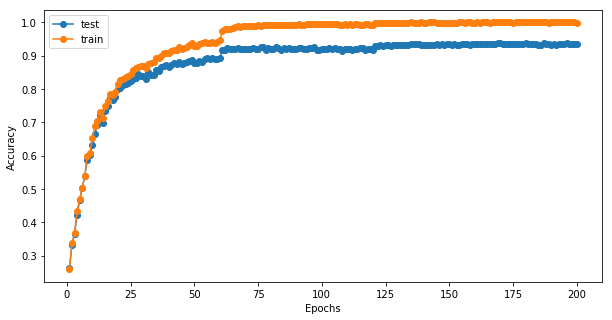

In [33]:
print(np.mean(model_compile.test_acc_list[-10:]))
print(np.mean(model_compile.train_acc_list[-10:]))
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)